### Importing Required Librarires

In [1]:
# !pip install --upgrade category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.model_selection import train_test_split
from category_encoders import CatBoostEncoder,TargetEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import statsmodels.api as sma
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'

plt.rcParams['figure.figsize'] = [15,8]

# Creating custom color
colors = ['#97C1A9','#DCDCDC','#AFC197','#9AC197','#97C1BE','#97C1A2','#C1979A',
          '#A997C1','#77AE8F','#DCDCDC','#67A481','#C197AF']

### Reading the dataset and viewing first five rows

In [4]:
pd.set_option('display.max_columns',22)

In [5]:
df = pd.read_csv('Airbnb_Price.csv')

df.head()

City      Day     realSum     room_type  room_shared  room_private  \
0  Amsterdam  Weekday  194.033698  Private room        False          True   
1  Amsterdam  Weekday  344.245776  Private room        False          True   
2  Amsterdam  Weekday  264.101422  Private room        False          True   
3  Amsterdam  Weekday  433.529398  Private room        False          True   
4  Amsterdam  Weekday  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2              False      1    0                  10   
1                4              False      0    0                   8   
2                2              False      0    1                   9   
3                4              False      0    1                   9   
4                2               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

In [24]:
df.tail()

City      Day     realSum        room_type  person_capacity  \
51702  Vienna  Weekend  715.938574  Entire home/apt                6   
51703  Vienna  Weekend  304.793960  Entire home/apt                2   
51704  Vienna  Weekend  637.168969  Entire home/apt                2   
51705  Vienna  Weekend  301.054157     Private room                2   
51706  Vienna  Weekend  133.230489     Private room                4   

       host_is_superhost  multi  biz  cleanliness_rating  \
51702              False      0    1                  10   
51703              False      0    0                   8   
51704              False      0    0                  10   
51705              False      0    0                  10   
51706               True      1    0                  10   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
51702                         100         3  0.530181    0.135447  219.402478   
51703                          86         1  0.810205    0.100839  204.970121   
51704                          93         1  0.994051    0.202539  169.073402   
51705                          87         1  3.044100    0.287435  109.236574   
51706                          93         1  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  
51702        15.712158  438.756874        10.604584  16.37940  48.21136  
51703        14.678608  342.182813         8.270427  16.38070  48.20296  
51704        12.107921  282.296425         6.822996  16.38568  48.20460  
51705         7.822803  158.563398         3.832416  16.34100  48.19200  
51706        10.774264  225.247293         5.444140  16.39066  48.20811

### Checking the shape and dimension of dataset

In [6]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 51707 rows and 21 columns


In [7]:
print(f'The dimension of the dataset is {df.ndim}')

The dimension of the dataset is 2


### Checking the datatype, number of non null values and name of each variable in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        51707 non-null  object 
 1   Day                         51707 non-null  object 
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int64  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

### Checking for the missing values. Displaying number of missing values per column

In [9]:
missing_values = pd.DataFrame({'Number of missing values':df.isnull().sum(),
                              'Percentage of missing values':df.isnull().sum()/len(df)})

missing_values

Number of missing values  \
City                                               0   
Day                                                0   
realSum                                            0   
room_type                                          0   
room_shared                                        0   
room_private                                       0   
person_capacity                                    0   
host_is_superhost                                  0   
multi                                              0   
biz                                                0   
cleanliness_rating                                 0   
guest_satisfaction_overall                         0   
bedrooms                                           0   
dist                                               0   
metro_dist                                         0   
attr_index                                         0   
attr_index_norm                                    0   
rest_index                                         0   
rest_index_norm                                    0   
lng                                                0   
lat                                                0   

                            Percentage of missing values  
City                                                 0.0  
Day                                                  0.0  
realSum                                              0.0  
room_type                                            0.0  
room_shared                                          0.0  
room_private                                         0.0  
person_capacity                                      0.0  
host_is_superhost                                    0.0  
multi                                                0.0  
biz                                                  0.0  
cleanliness_rating                                   0.0  
guest_satisfaction_overall                           0.0  
bedrooms                                             0.0  
dist                                                 0.0  
metro_dist                                           0.0  
attr_index                                           0.0  
attr_index_norm                                      0.0  
rest_index                                           0.0  
rest_index_norm                                      0.0  
lng                                                  0.0  
lat                                                  0.0

From above dataframe we can see that there are no missing values present in the dataset

### Dropping of irrelevant columns from the dataset

We can drop room_shared and room_private columns as they are subset of room_type column and attr_index , rest_index as there is normalised values of those columns is already there.

In [10]:
df.drop(columns = ['room_shared','room_private'] , inplace = True)

### Checking for the descriptive statistics of the dataset

In [11]:
df.describe(include = 'object').T

count unique              top   freq
City       51707     10           London   9993
Day        51707      2          Weekend  26207
room_type  51707      3  Entire home/apt  32648

From above report we could infer that :-
    
1) There are 10 unique cities listed and majority of the properties are listed from the city London with frequency of 9993

2) Majority of the bookings was made on weekends than weekdays

3) For room type most customers preferred entire home or apartment


In [12]:
df.describe().T

count        mean         std        min  \
realSum                     51707.0  279.879591  327.948386  34.779339   
person_capacity             51707.0    3.161661    1.298545   2.000000   
multi                       51707.0    0.291353    0.454390   0.000000   
biz                         51707.0    0.350204    0.477038   0.000000   
cleanliness_rating          51707.0    9.390624    0.954868   2.000000   
guest_satisfaction_overall  51707.0   92.628232    8.945531  20.000000   
bedrooms                    51707.0    1.158760    0.627410   0.000000   
dist                        51707.0    3.191285    2.393803   0.015045   
metro_dist                  51707.0    0.681540    0.858023   0.002301   
attr_index                  51707.0  294.204105  224.754123  15.152201   
attr_index_norm             51707.0   13.423792    9.807985   0.926301   
rest_index                  51707.0  626.856696  497.920226  19.576924   
rest_index_norm             51707.0   22.786177   17.804096   0.592757   
lng                         51707.0    7.426068    9.799725  -9.226340   
lat                         51707.0   45.671128    5.249263  37.953000   

                                   25%         50%         75%           max  
realSum                     148.752174  211.343089  319.694286  18545.450280  
person_capacity               2.000000    3.000000    4.000000      6.000000  
multi                         0.000000    0.000000    1.000000      1.000000  
biz                           0.000000    0.000000    1.000000      1.000000  
cleanliness_rating            9.000000   10.000000   10.000000     10.000000  
guest_satisfaction_overall   90.000000   95.000000   99.000000    100.000000  
bedrooms                      1.000000    1.000000    1.000000     10.000000  
dist                          1.453142    2.613538    4.263077     25.284557  
metro_dist                    0.248480    0.413269    0.737840     14.273577  
attr_index                  136.797385  234.331748  385.756381   4513.563486  
attr_index_norm               6.380926   11.468305   17.415082    100.000000  
rest_index                  250.854114  522.052783  832.628988   6696.156772  
rest_index_norm               8.751480   17.542238   32.964603    100.000000  
lng                          -0.072500    4.873000   13.518825     23.786020  
lat                          41.399510   47.506690   51.471885     52.641410

### Univariate Analysis

In [13]:
df.columns

Index(['City', 'Day', 'realSum', 'room_type', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        51707 non-null  object 
 1   Day                         51707 non-null  object 
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  int64  
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

#### City

In [23]:
df['City'].value_counts().sort_index()

Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Libson       5763
London       9993
Paris        6688
Rome         9027
Vienna       3537
Name: City, dtype: int64

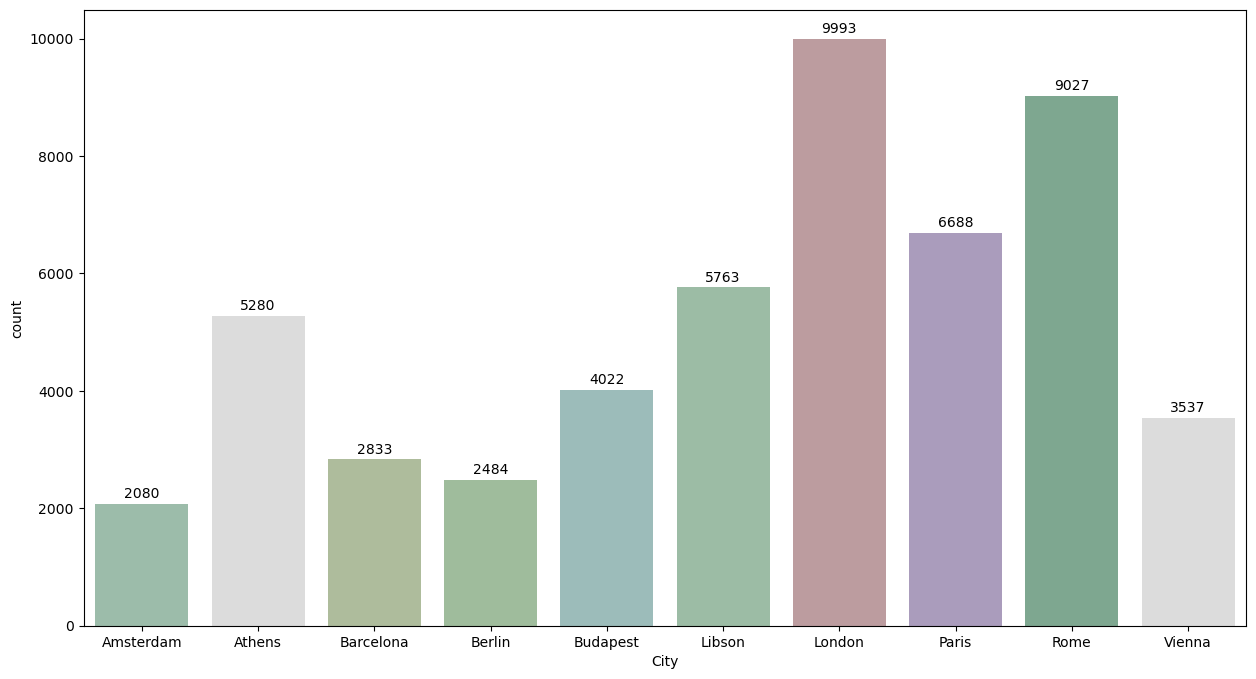

In [21]:
sns.countplot(x = df['City'].sort_values() , palette = colors )

for i,v in enumerate(df['City'].value_counts().sort_index()):
    plt.text(x = i , y = v+ 100,  s = v , ha = 'center')


In [ ]:
#df = df[['City']].astype({'City': float})

#### Day

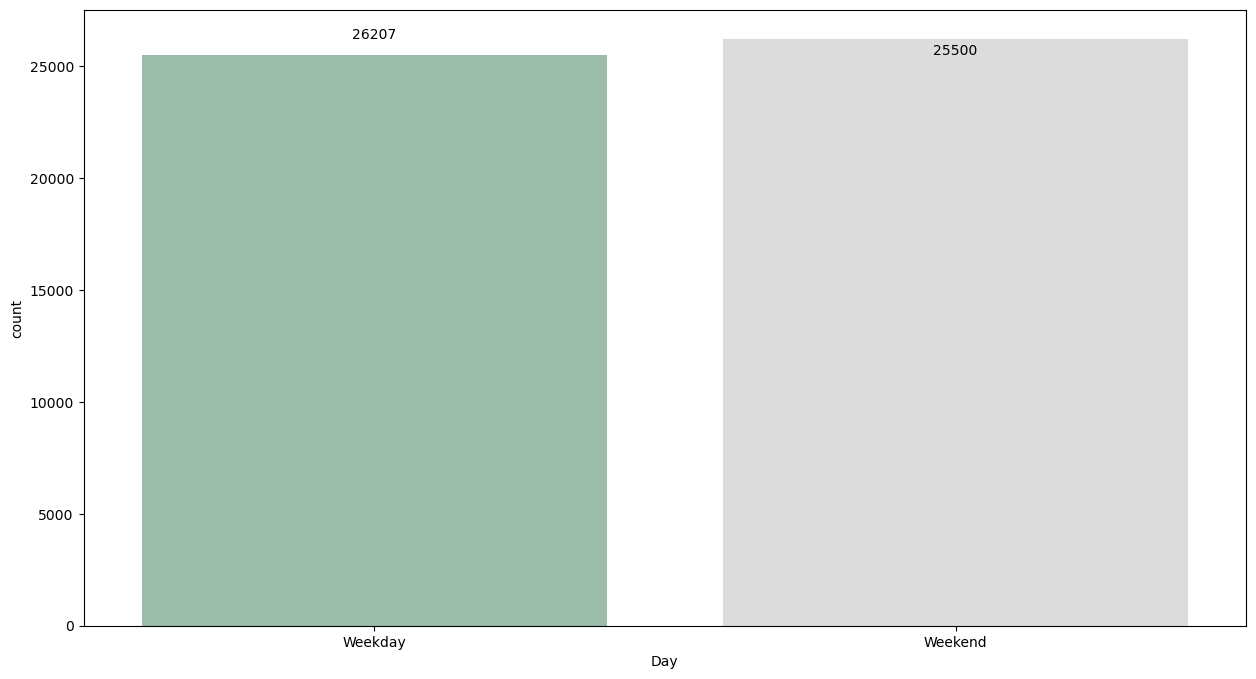

In [25]:
sns.countplot(x = df['Day'] , palette = colors)

for i,v in enumerate(df['Day'].value_counts()):
    plt.text(x = i , y = v , s = v , ha = 'center')

#### Room_type

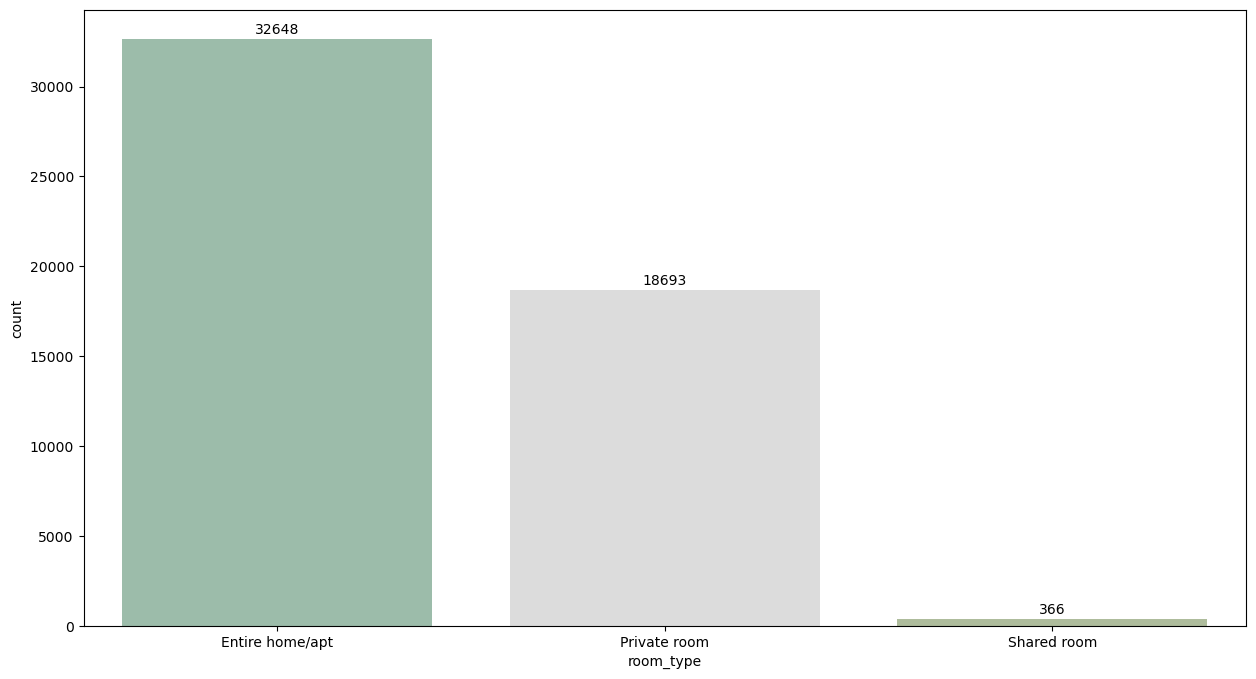

In [26]:
sns.countplot(x = df['room_type'].sort_values(), palette = colors)

for i,v in enumerate(df['room_type'].value_counts().sort_index()):
    plt.text(x = i , y = v + 300, s  = v , ha = 'center')

#### host_is_superhost

In [28]:
df['host_is_superhost'].value_counts().sort_index()

False    38475
True     13232
Name: host_is_superhost, dtype: int64

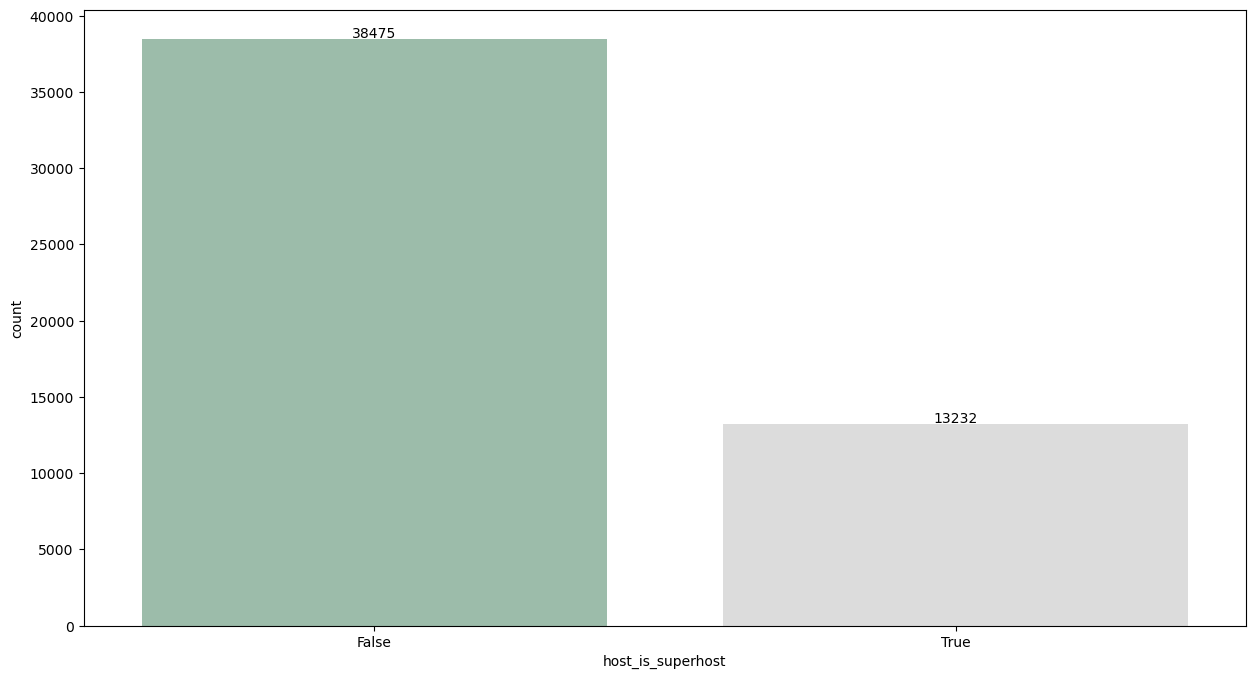

In [27]:
sns.countplot(x = df['host_is_superhost'].sort_values() , palette = colors)

for i,v in enumerate(df['host_is_superhost'].value_counts().sort_index()):
    plt.text(x = i , y = v + 100, s= v , ha = 'center')

#### cleanliness_rating

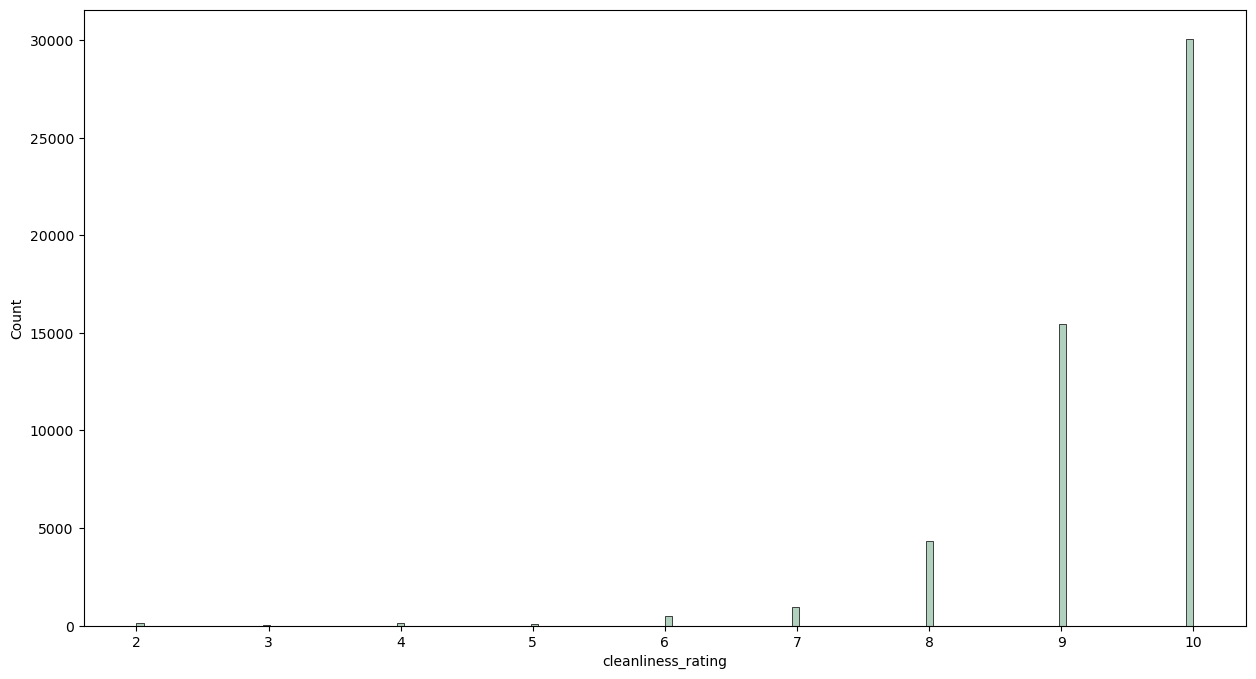

In [29]:
sns.histplot(x = df['cleanliness_rating'] , color = '#97C1A9')
plt.show()

#### Guest_satisfaction_overall

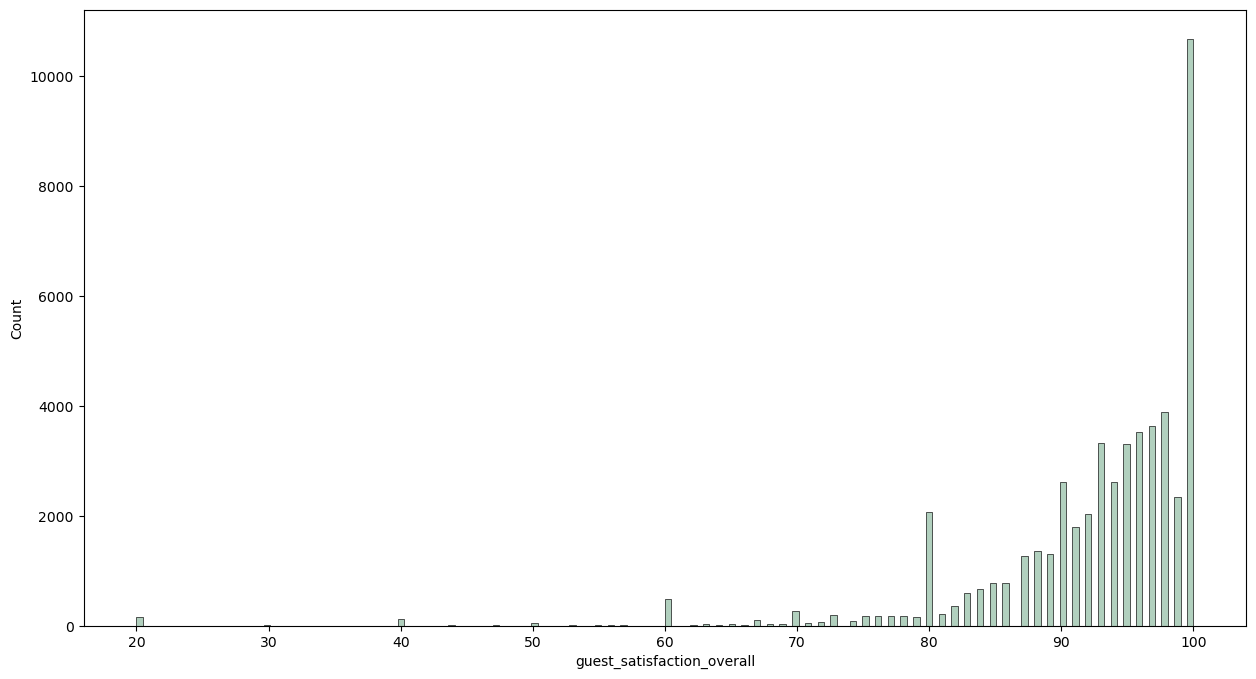

In [30]:
sns.histplot(x= df['guest_satisfaction_overall'] , color = '#97C1A9')
plt.show()

#### Bedrooms

In [34]:
df.head()

City      Day     realSum     room_type  person_capacity  \
0  Amsterdam  Weekday  194.033698  Private room                2   
1  Amsterdam  Weekday  344.245776  Private room                4   
2  Amsterdam  Weekday  264.101422  Private room                2   
3  Amsterdam  Weekday  433.529398  Private room                4   
4  Amsterdam  Weekday  485.552926  Private room                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

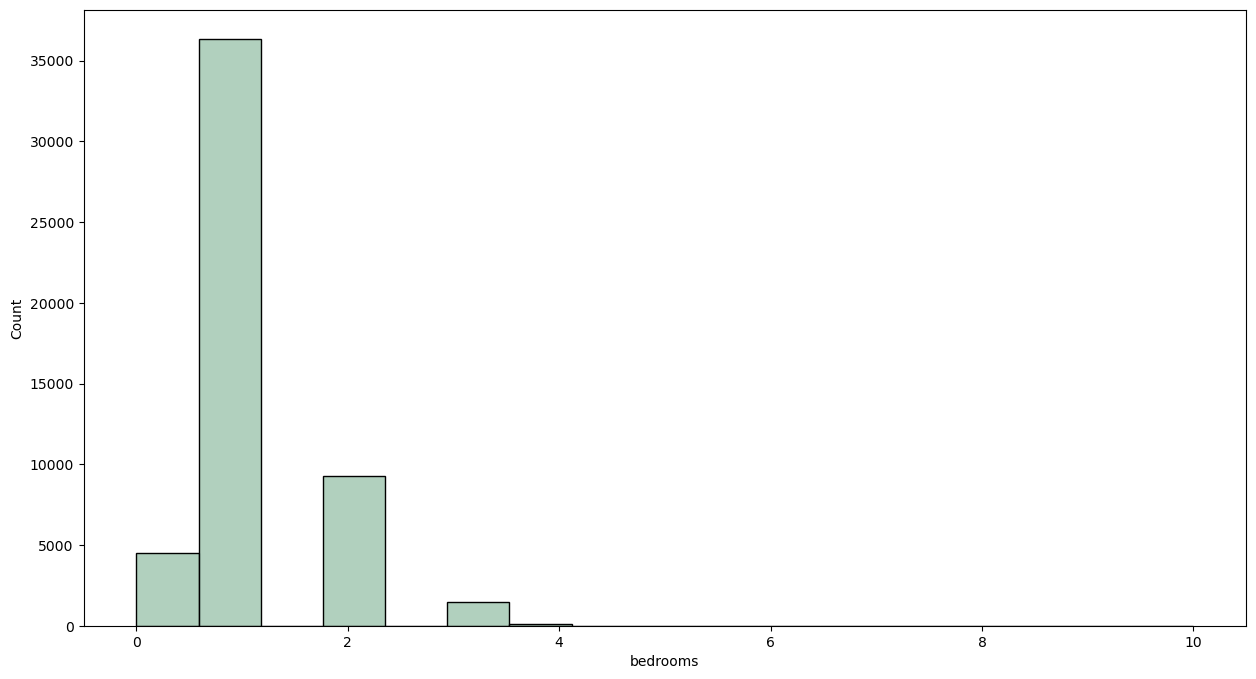

In [31]:
sns.histplot(x= df['bedrooms'] , color = '#97C1A9')
plt.show()

### Bivariate Analysis

#### City vs Price

In [44]:
df.groupby(by = 'City')['realSum'].count()

City
Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Libson       5763
London       9993
Paris        6688
Rome         9027
Vienna       3537
Name: realSum, dtype: int64

In [36]:
df.groupby(by = 'City')['realSum'].mean()

City
Amsterdam    573.112795
Athens       151.744121
Barcelona    293.753706
Berlin       244.583752
Budapest     176.513548
Libson       238.210479
London       362.469256
Paris        392.531403
Rome         205.391950
Vienna       241.582484
Name: realSum, dtype: float64

In [37]:
df.head()

City      Day     realSum     room_type  person_capacity  \
0  Amsterdam  Weekday  194.033698  Private room                2   
1  Amsterdam  Weekday  344.245776  Private room                4   
2  Amsterdam  Weekday  264.101422  Private room                2   
3  Amsterdam  Weekday  433.529398  Private room                4   
4  Amsterdam  Weekday  485.552926  Private room                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

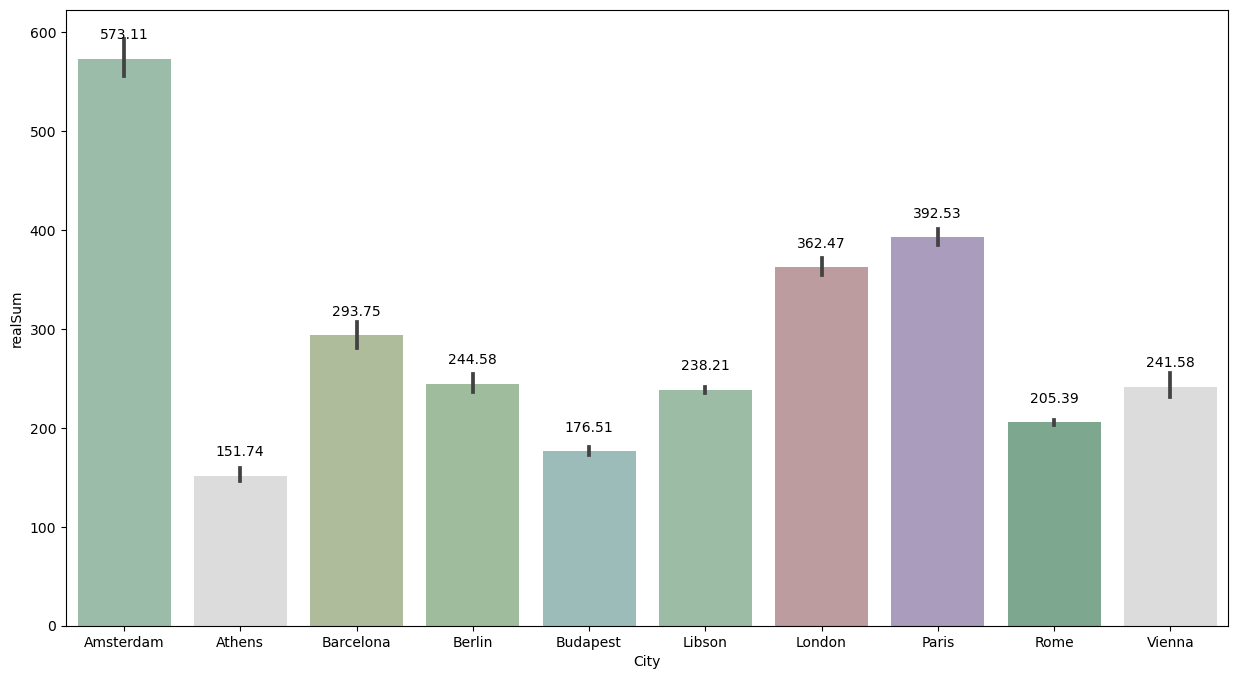

In [35]:
sns.barplot(x= df['City'].sort_values(),y = df['realSum'] , palette = colors)

for i,v in enumerate(df.groupby(by = 'City')['realSum'].mean()):
    plt.text(x = i, y = v + 20, s= round(v,2) , ha = 'center')

#### Day vs Price

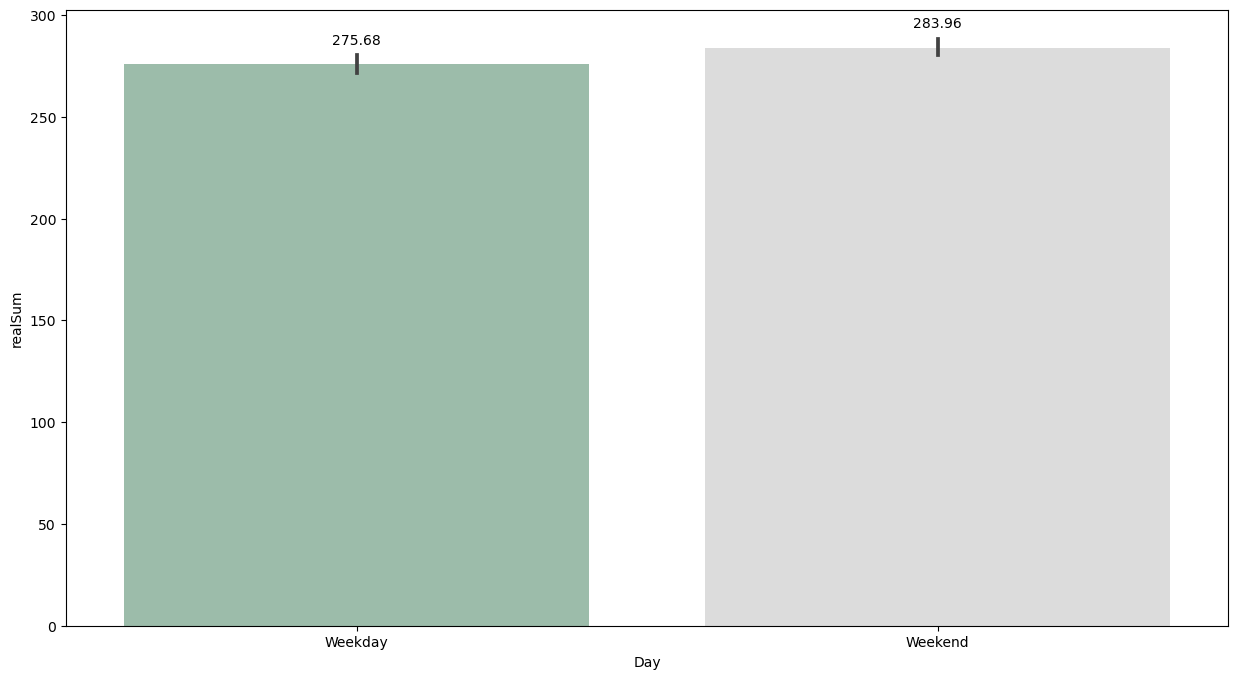

In [45]:
sns.barplot(x= df['Day'].sort_values(), y= df['realSum'], palette = colors)

for i,v in enumerate(df.groupby('Day')['realSum'].mean()):
    plt.text(x =i , y = v+10, s=round(v,2) , ha ='center')

#### Room_type vs Price

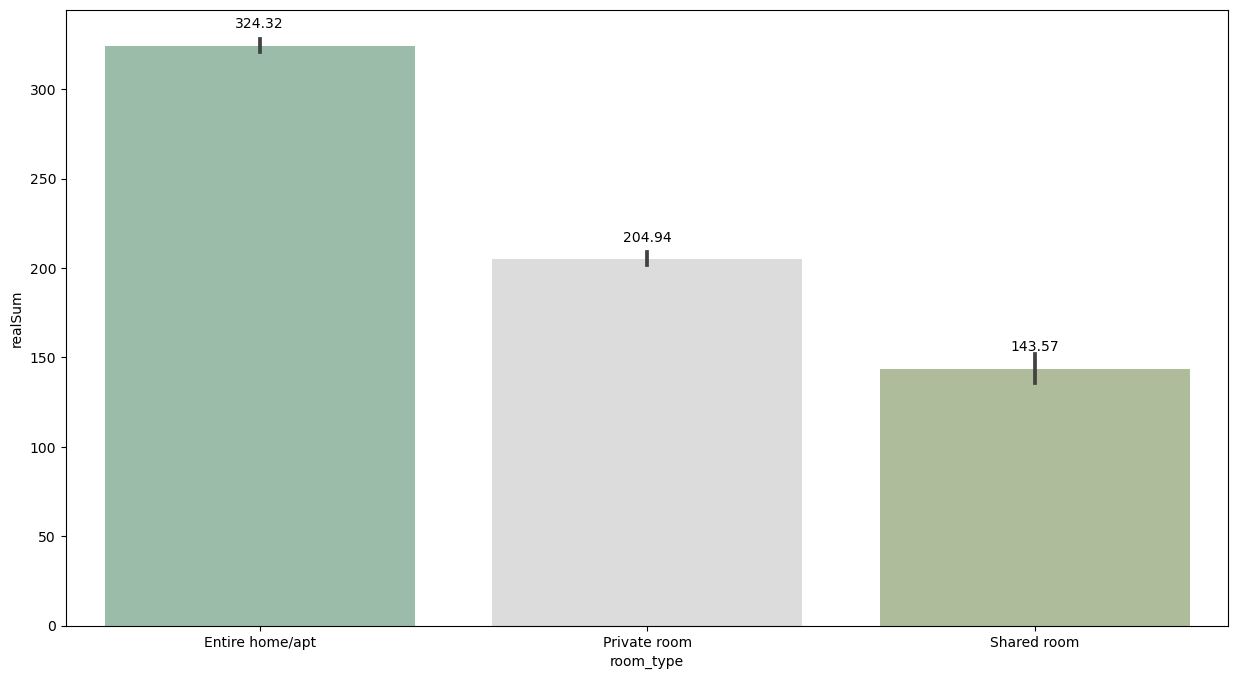

In [46]:
sns.barplot(x= df['room_type'].sort_values(),y = df['realSum'],palette=colors)

for i,v in enumerate(df.groupby('room_type')['realSum'].mean()):
    plt.text(x=i , y=v + 10, s= round(v,2) , ha='center')


#### Host_is_superhost vs Price

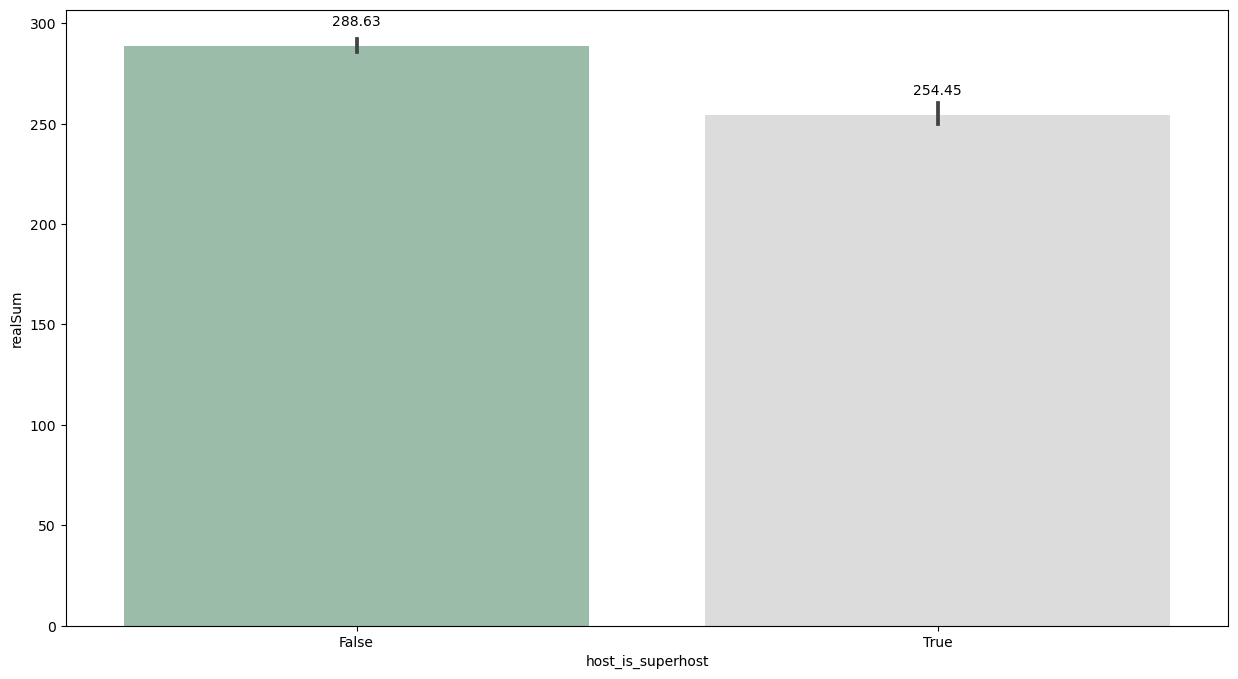

In [47]:
sns.barplot(x = df['host_is_superhost'],y = df['realSum'],palette=colors)

for i,v in enumerate(df.groupby('host_is_superhost')['realSum'].mean()):
    plt.text(x=i , y=v + 10 , s=round(v,2) , ha='center')

#### Cleanliness_rating vs Price

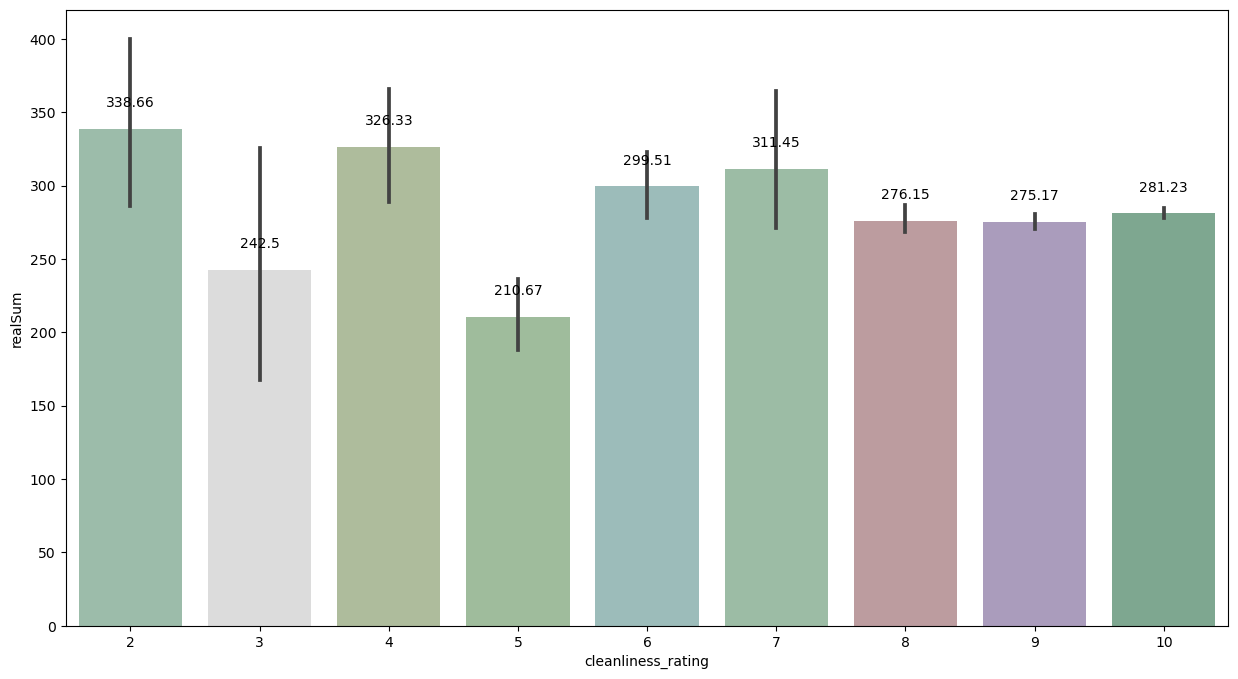

In [48]:
sns.barplot(x= df['cleanliness_rating'],y= df['realSum'],palette = colors)

for i,v in enumerate(df.groupby('cleanliness_rating')['realSum'].mean()):
    plt.text(x=i , y=v + 15, s=round(v,2), ha= 'center')

#### Bedrooms vs Price

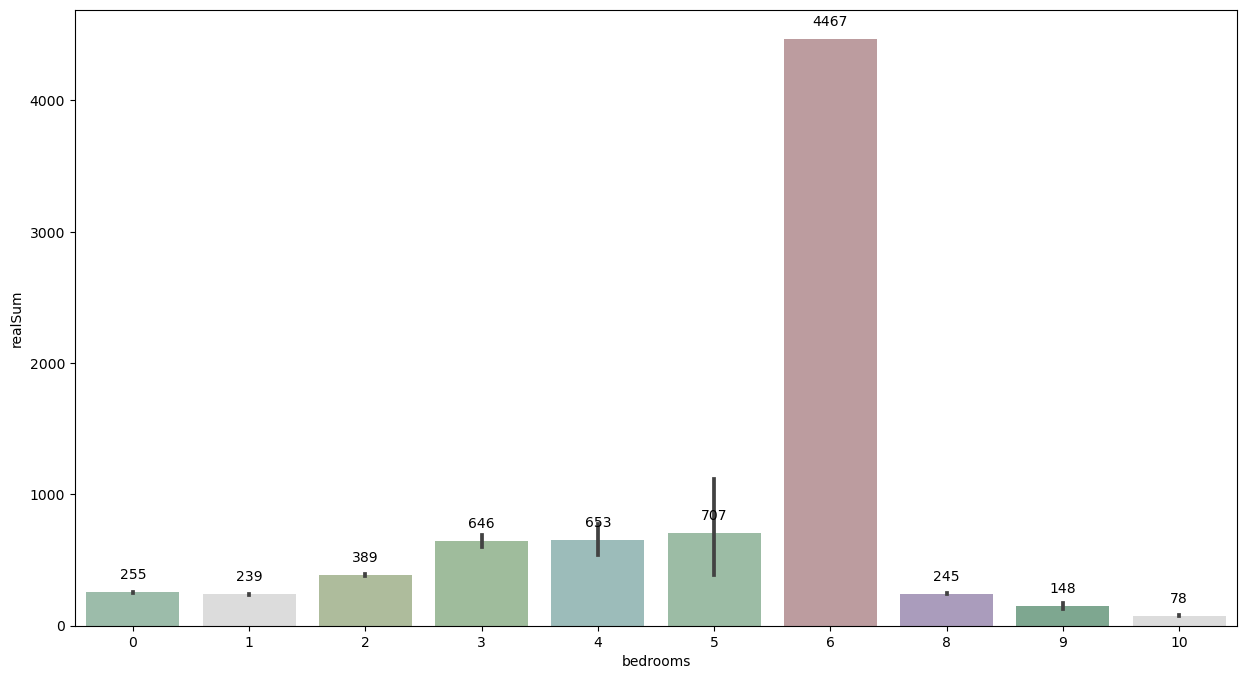

In [49]:
sns.barplot(x = df['bedrooms'],y = df['realSum'],palette=colors)

for i,v in enumerate(df.groupby('bedrooms')['realSum'].mean()):
    plt.text(x=i , y=v + 100, s=round(v) , ha='center')

### Mutivariate Analysis

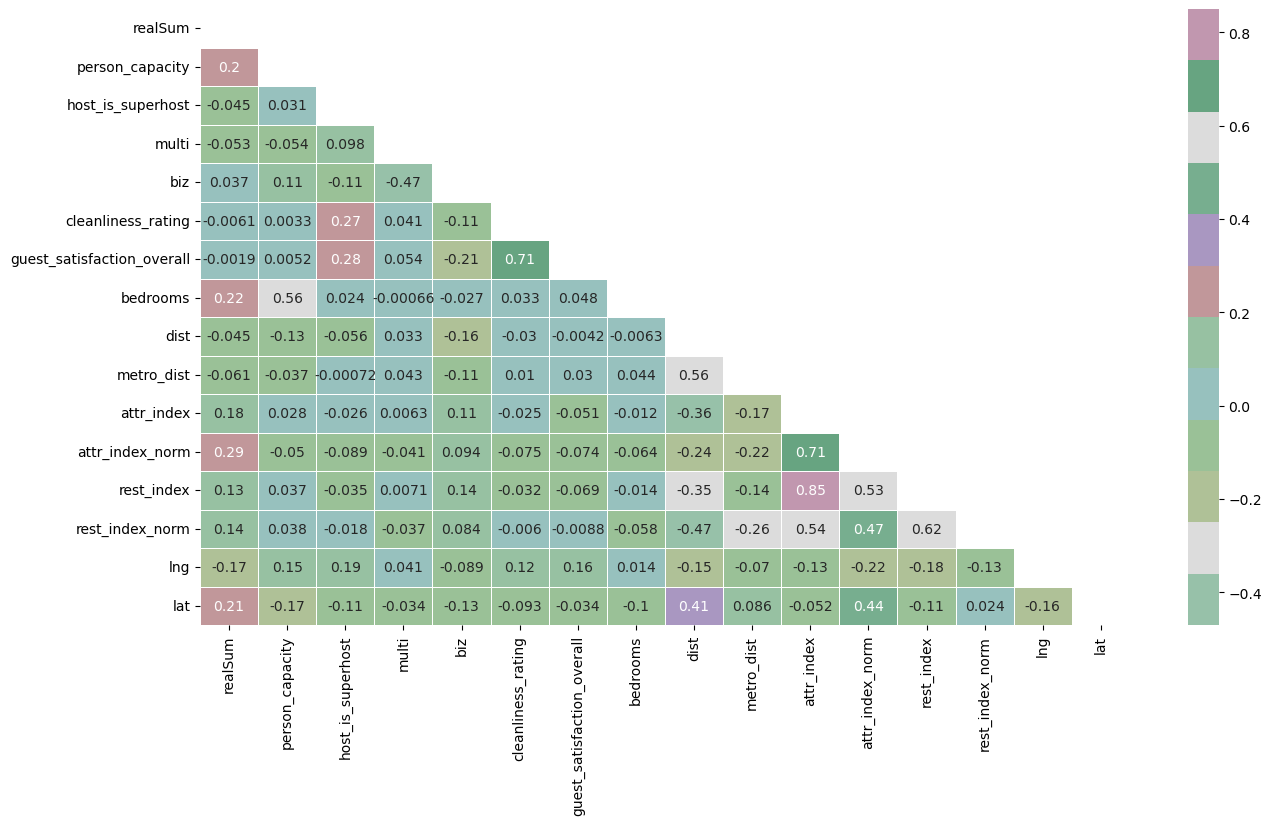

In [50]:
sns.heatmap(df.corr() , cmap = colors , mask = np.triu(df.corr()) , linewidth=0.5, annot = True)
plt.show()

### Feature Engineering

A new column named "Region" will be created by leveraging the latitude and longitude values of each city.

In [51]:
df['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Libson',
       'London', 'Paris', 'Rome', 'Vienna'], dtype=object)

In [52]:
df_amsterdam = df[df['City'] == 'Amsterdam']
df_athens = df[df['City'] == 'Athens']
df_barcelona = df[df['City'] == 'Barcelona']
df_berlin = df[df['City'] == 'Berlin']
df_budapest = df[df['City'] == 'Budapest']
df_lisbon = df[df['City'] == 'Libson']
df_london = df[df['City'] == 'London']
df_paris = df[df['City'] == 'Paris']
df_rome = df[df['City'] == 'Rome']
df_vienna = df[df['City'] == 'Vienna']

In [54]:
df_amsterdam

City      Day      realSum        room_type  person_capacity  \
0     Amsterdam  Weekday   194.033698     Private room                2   
1     Amsterdam  Weekday   344.245776     Private room                4   
2     Amsterdam  Weekday   264.101422     Private room                2   
3     Amsterdam  Weekday   433.529398     Private room                4   
4     Amsterdam  Weekday   485.552926     Private room                2   
...         ...      ...          ...              ...              ...   
2075  Amsterdam  Weekend   473.132894  Entire home/apt                2   
2076  Amsterdam  Weekend   491.645771  Entire home/apt                3   
2077  Amsterdam  Weekend  1812.855904  Entire home/apt                4   
2078  Amsterdam  Weekend   399.315727  Entire home/apt                2   
2079  Amsterdam  Weekend   728.798069  Entire home/apt                4   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                 False      1    0                  10   
1                 False      0    0                   8   
2                 False      0    1                   9   
3                 False      0    1                   9   
4                  True      0    0                  10   
...                 ...    ...  ...                 ...   
2075              False      0    0                   9   
2076              False      0    0                  10   
2077              False      0    0                   8   
2078              False      0    0                   9   
2079               True      0    0                  10   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                             93         1  5.022964    2.539380   78.690379   
1                             85         1  0.488389    0.239404  631.176378   
2                             87         1  5.748312    3.651621   75.275877   
3                             90         2  0.384862    0.439876  493.272534   
4                             98         1  0.544738    0.318693  552.830324   
...                          ...       ...       ...         ...         ...   
2075                          98         0  1.911795    1.723938  283.762206   
2076                          98         2  1.478016    1.465641  241.418511   
2077                          84         5  1.943031    0.388542  257.946814   
2078                          89         1  3.719001    0.882094  156.045916   
2079                          97         2  1.164313    0.454608  426.540426   

      attr_index_norm  rest_index  rest_index_norm      lng       lat Region  
0            4.166708   98.253896         6.846473  4.90569  52.41772   West  
1           33.421209  837.280757        58.342928  4.90005  52.37432   West  
2            3.985908   95.386955         6.646700  4.97512  52.36103  North  
3           26.119108  875.033098        60.973565  4.89417  52.37663   West  
4           29.272733  815.305740        56.811677  4.90051  52.37508   West  
...               ...         ...              ...      ...       ...    ...  
2075        15.023909  351.969002        30.683248  4.86742  52.36629   West  
2076        12.782005  312.785000        27.267344  4.88066  52.38412   West  
2077        13.657103  336.589450        29.342520  4.90688  52.35794   East  
2078         8.261917  189.962217        16.560145  4.86056  52.34639  South  
2079        22.583362  559.122644        48.742073  4.89676  52.36301   West  

[2080 rows x 20 columns]

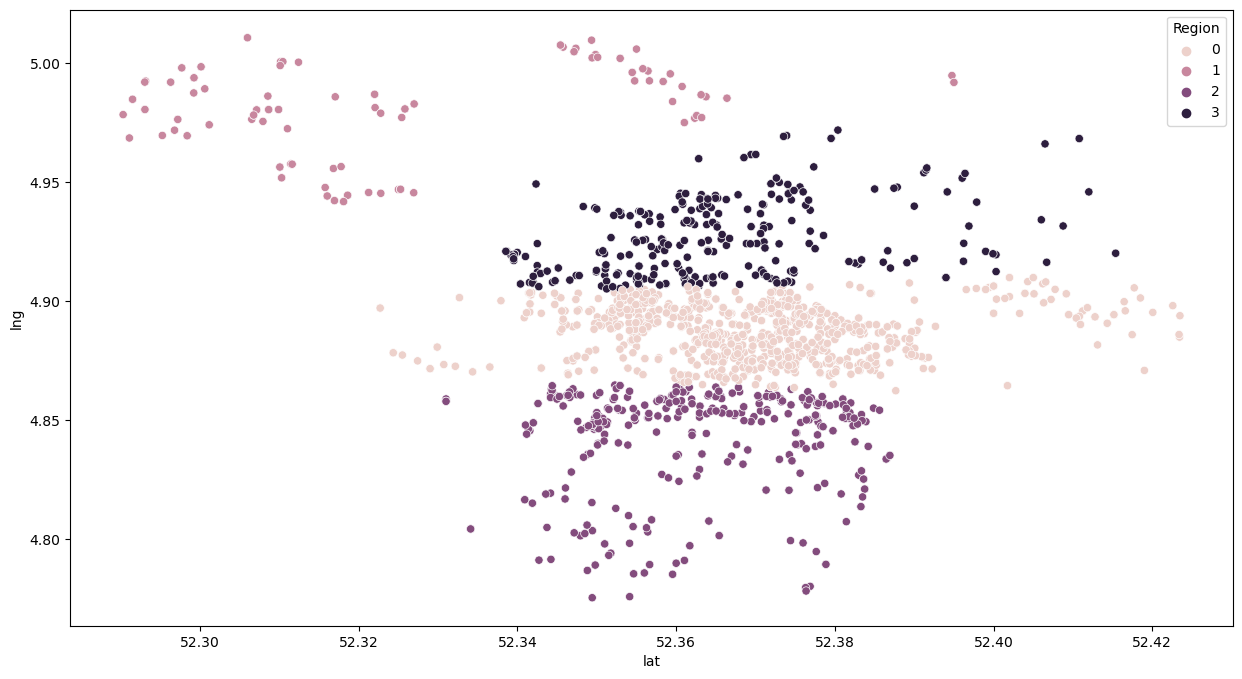

In [56]:
#Amsterdam
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_amsterdam[['lat','lng']])
lab=kmod.labels_
df_amsterdam['Region']=lab
#sns.scatterplot(data=data, x="value", y="time", hue="crop_type")
sns.scatterplot(x = df_amsterdam['lat'], y = df_amsterdam['lng'],hue=df_amsterdam['Region'])
df_amsterdam['Region']=df_amsterdam['Region'].map({0:'West',1:'North',2:'South',3:'East'})

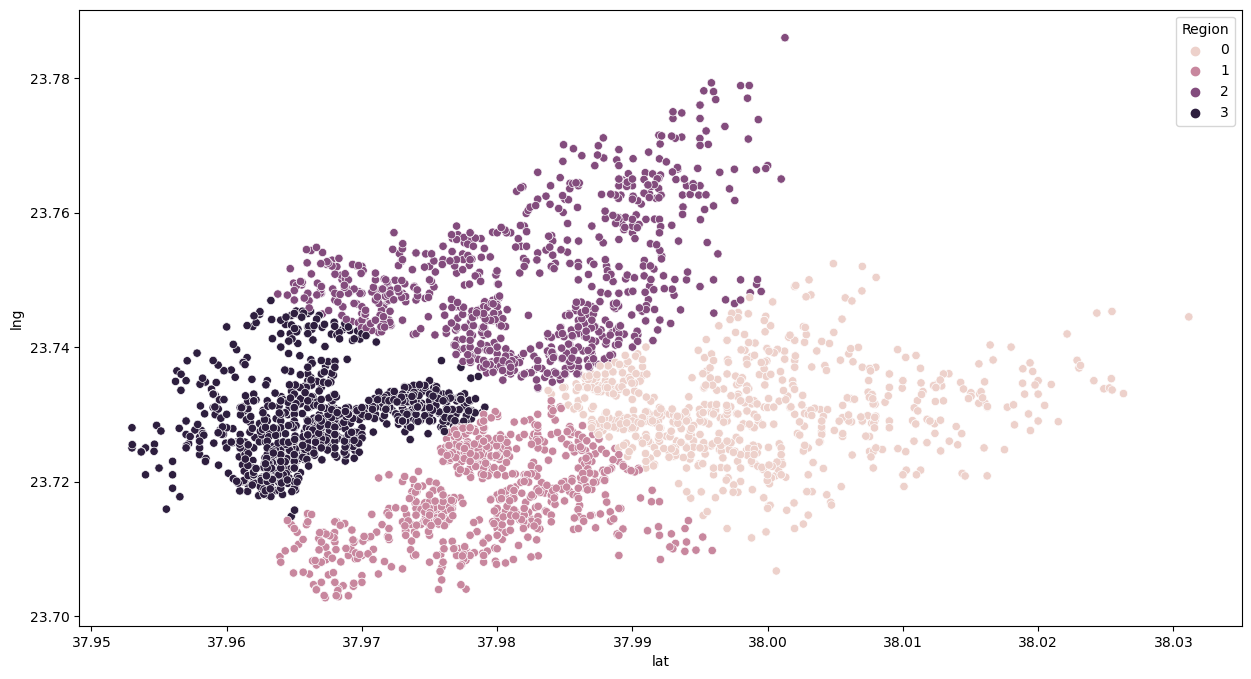

In [57]:
#Athens
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_athens[['lat','lng']])
lab=kmod.labels_
df_athens['Region']=lab
sns.scatterplot(x = df_athens['lat'],y = df_athens['lng'],hue=df_athens['Region'])
df_athens['Region']=df_athens['Region'].map({0:'West',1:'North',2:'South',3:'East'})

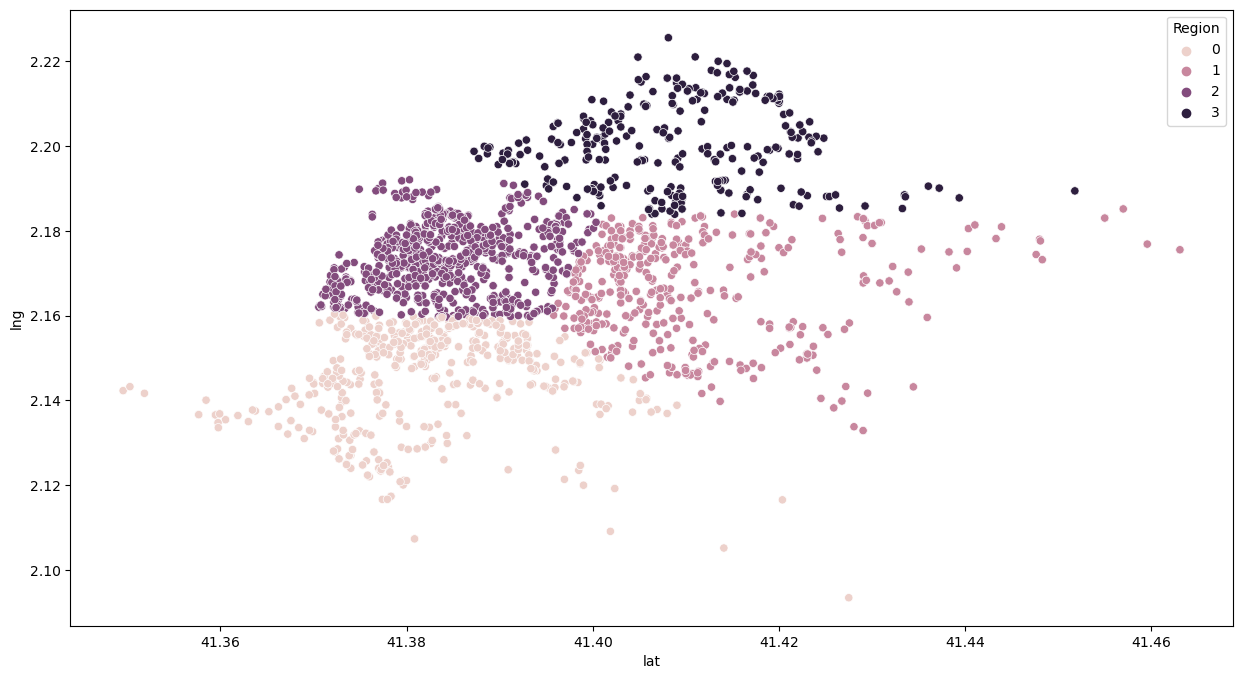

In [58]:
#Barcelona
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_barcelona[['lat','lng']])
lab=kmod.labels_
df_barcelona['Region']=lab
sns.scatterplot(x= df_barcelona['lat'],y = df_barcelona['lng'],hue=df_barcelona['Region'])
df_barcelona['Region']=df_barcelona['Region'].map({0:'West',1:'North',2:'South',3:'East'})

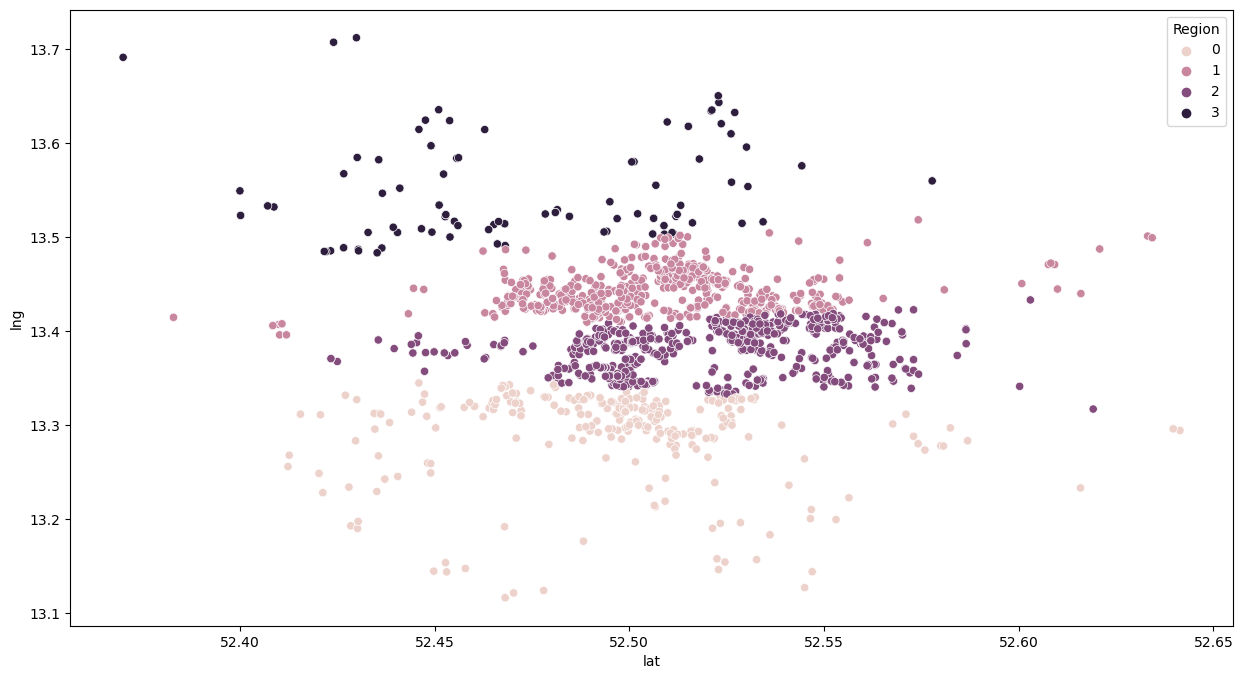

In [59]:
#Berlin
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_berlin[['lat','lng']])
lab=kmod.labels_
df_berlin['Region']=lab
sns.scatterplot(x = df_berlin['lat'],y = df_berlin['lng'],hue=df_berlin['Region'])
df_berlin['Region']=df_berlin['Region'].map({0:'West',1:'North',2:'South',3:'East'})

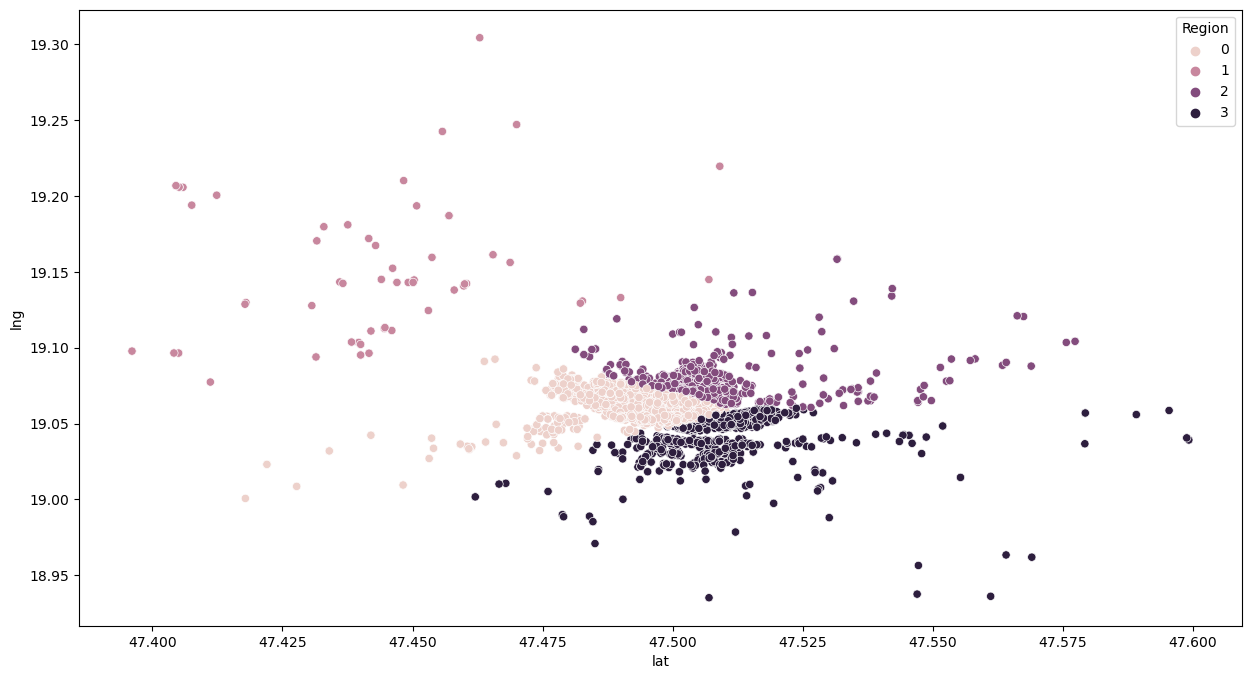

In [60]:
#Budapest
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_budapest[['lat','lng']])
lab=kmod.labels_
df_budapest['Region']=lab
sns.scatterplot(x= df_budapest['lat'],y= df_budapest['lng'],hue=df_budapest['Region'])
df_budapest['Region']=df_budapest['Region'].map({0:'West',1:'North',2:'South',3:'East'})

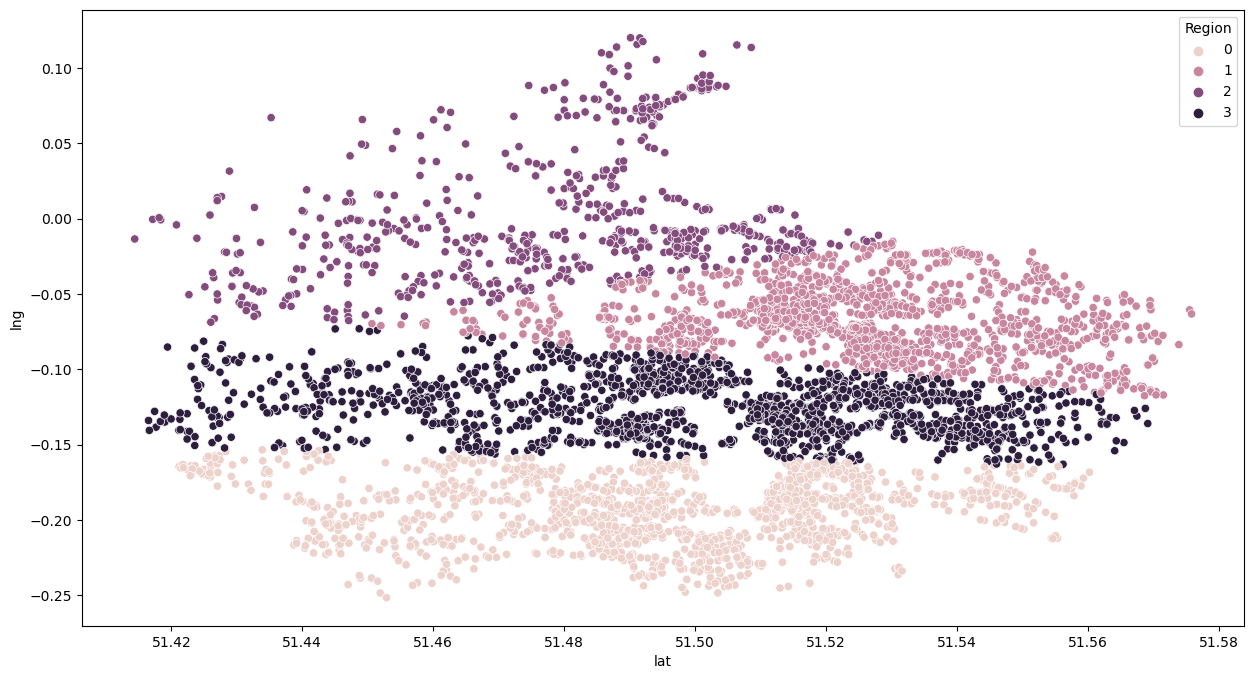

In [61]:
#London
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_london[['lat','lng']])
lab=kmod.labels_
df_london['Region']=lab
sns.scatterplot(x= df_london['lat'],y = df_london['lng'],hue=df_london['Region'])
df_london['Region']=df_london['Region'].map({0:'West',1:'North',2:'South',3:'East'})

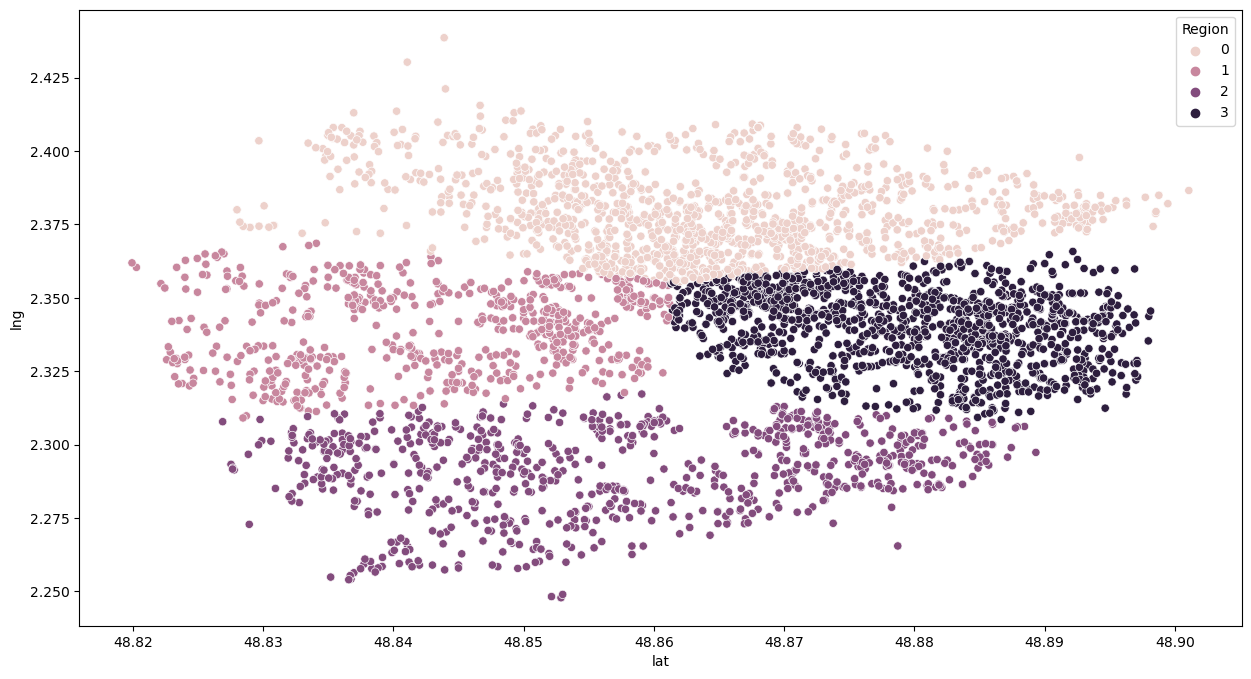

In [62]:
#Paris
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_paris[['lat','lng']])
lab=kmod.labels_
df_paris['Region']=lab
sns.scatterplot(x = df_paris['lat'],y = df_paris['lng'],hue=df_paris['Region'])
df_paris['Region']=df_paris['Region'].map({0:'West',1:'North',2:'South',3:'East'})

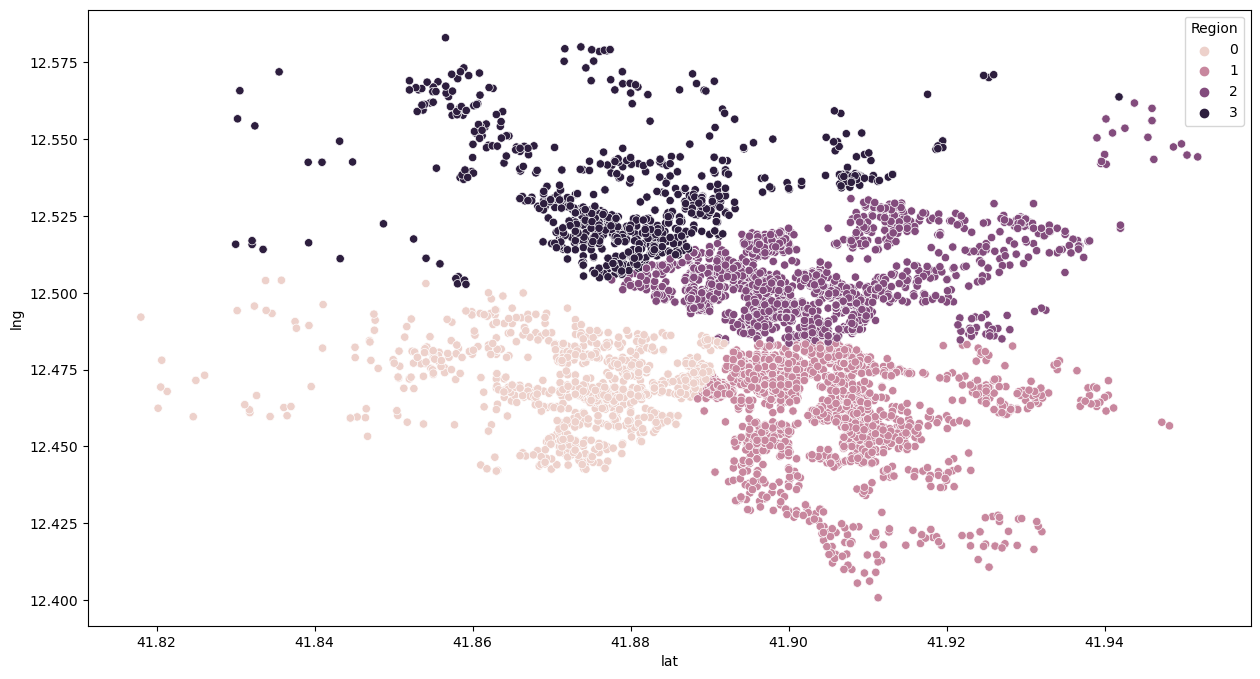

In [63]:
#Rome
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_rome[['lat','lng']])
lab=kmod.labels_
df_rome['Region']=lab
sns.scatterplot(x= df_rome['lat'],y = df_rome['lng'],hue=df_rome['Region'])
df_rome['Region']=df_rome['Region'].map({0:'West',1:'North',2:'South',3:'East'})

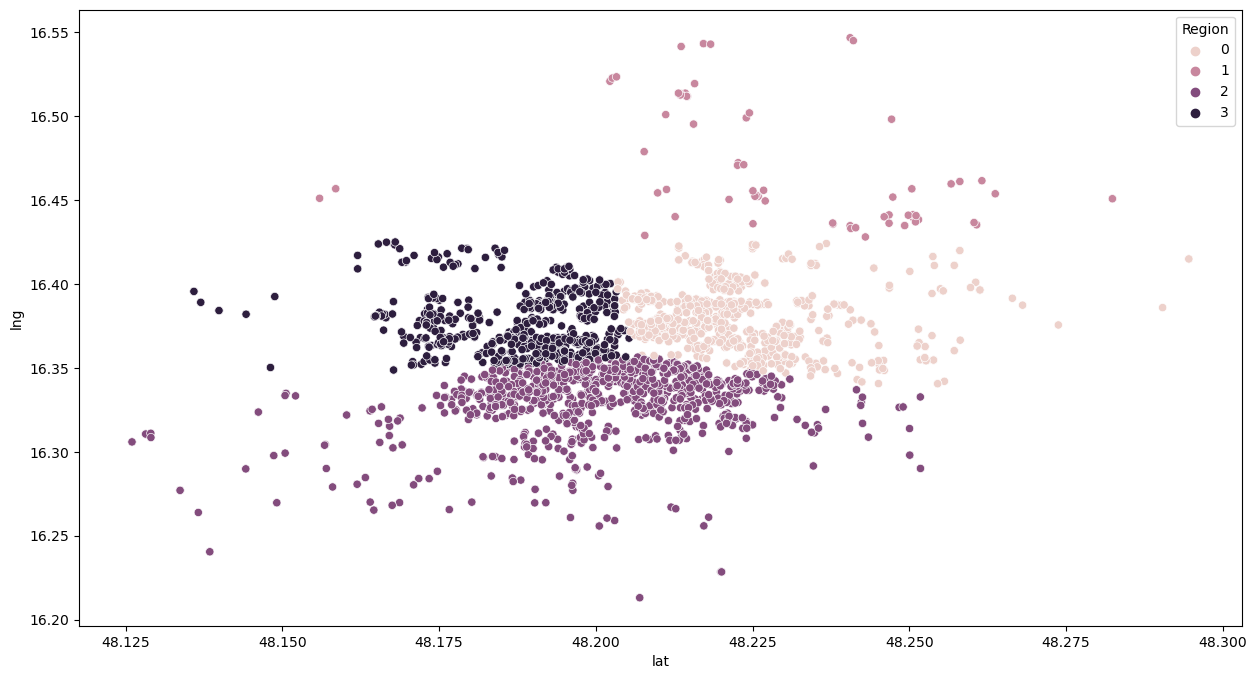

In [64]:
#Vienna
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_vienna[['lat','lng']])
lab=kmod.labels_
df_vienna['Region']=lab
sns.scatterplot(x= df_vienna['lat'],y = df_vienna['lng'],hue=df_vienna['Region'])
df_vienna['Region']=df_vienna['Region'].map({0:'West',1:'North',2:'South',3:'East'})

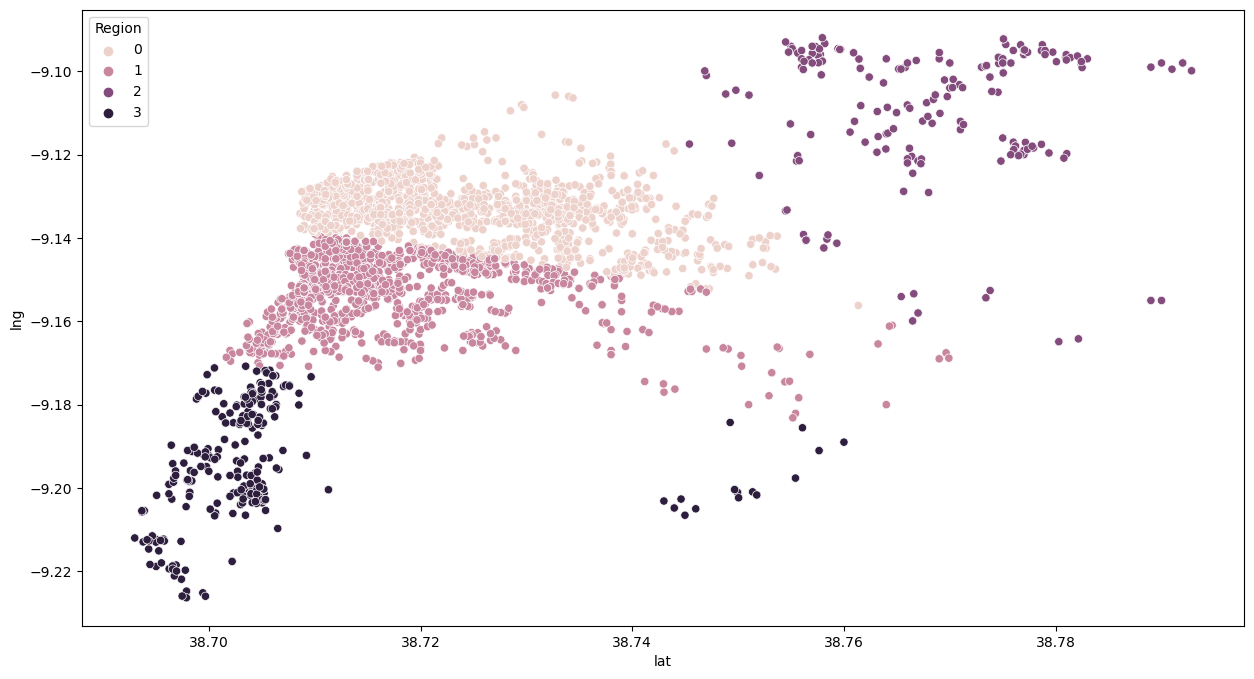

In [65]:
#Lisbon
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_lisbon[['lat','lng']])
lab=kmod.labels_
df_lisbon['Region']=lab
sns.scatterplot(x= df_lisbon['lat'],y= df_lisbon['lng'],hue=df_lisbon['Region'])
df_lisbon['Region']=df_lisbon['Region'].map({0:'West',1:'North',2:'South',3:'East'})

In [66]:
df = pd.concat([df_amsterdam,df_athens,df_barcelona,df_berlin,df_budapest,df_lisbon,df_london,df_paris,df_rome,df_vienna])

df.head()

City      Day     realSum     room_type  person_capacity  \
0  Amsterdam  Weekday  194.033698  Private room                2   
1  Amsterdam  Weekday  344.245776  Private room                4   
2  Amsterdam  Weekday  264.101422  Private room                2   
3  Amsterdam  Weekday  433.529398  Private room                4   
4  Amsterdam  Weekday  485.552926  Private room                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat Region  
0         4.166708   98.253896         6.846473  4.90569  52.41772   West  
1        33.421209  837.280757        58.342928  4.90005  52.37432   West  
2         3.985908   95.386955         6.646700  4.97512  52.36103  North  
3        26.119108  875.033098        60.973565  4.89417  52.37663   West  
4        29.272733  815.305740        56.811677  4.90051  52.37508   West

In [67]:
df.tail()

City      Day     realSum        room_type  person_capacity  \
51702  Vienna  Weekend  715.938574  Entire home/apt                6   
51703  Vienna  Weekend  304.793960  Entire home/apt                2   
51704  Vienna  Weekend  637.168969  Entire home/apt                2   
51705  Vienna  Weekend  301.054157     Private room                2   
51706  Vienna  Weekend  133.230489     Private room                4   

       host_is_superhost  multi  biz  cleanliness_rating  \
51702              False      0    1                  10   
51703              False      0    0                   8   
51704              False      0    0                  10   
51705              False      0    0                  10   
51706               True      1    0                  10   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
51702                         100         3  0.530181    0.135447  219.402478   
51703                          86         1  0.810205    0.100839  204.970121   
51704                          93         1  0.994051    0.202539  169.073402   
51705                          87         1  3.044100    0.287435  109.236574   
51706                          93         1  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat Region  
51702        15.712158  438.756874        10.604584  16.37940  48.21136   West  
51703        14.678608  342.182813         8.270427  16.38070  48.20296   East  
51704        12.107921  282.296425         6.822996  16.38568  48.20460   West  
51705         7.822803  158.563398         3.832416  16.34100  48.19200  South  
51706        10.774264  225.247293         5.444140  16.39066  48.20811   West

In [68]:
df['Region'].isnull().sum()

0

Dropping of individual latitude and longitude columns

In [69]:
df.drop(columns = ['lat','lng'],inplace = True)

Performing bining for guest satisfaction column. Creating 3 discrete bins namely score between 0-35 as poor , 36 - 70 as average and 71 - 100 as high

In [70]:
def binning(l):
    if l > 0 and l <= 35 :
        return 'Poor'
    elif l > 36 and l <= 70:
        return 'Average'
    else:
        return 'High'
    
df['guest_satisfaction_overall'] = df['guest_satisfaction_overall'].apply(binning)

### Performing hypothesis testing to find the significant variables

Hypothesis :

H0 : There is no significant relationship between the dependent and independent variable

Ha : There is significant relationship between the dependent and independent variable

Significance level :

Considering significance level as 0.05

In [72]:
# Creating a dataframe to store the results of statistical results

statistical_result = pd.DataFrame(columns = ['Column','Pvalue','Remarks'])

In [73]:
num_cols = ['dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm','attr_index','rest_index']
cat_cols = ['City', 'Day', 'room_type', 'person_capacity','host_is_superhost', 'cleanliness_rating', 
            'guest_satisfaction_overall','bedrooms','Region']

In [75]:
# Numerical vs Categorical - f_oneway test

for i in cat_cols:
    groups =  [df.loc[df[i] == subclass , 'realSum'] for subclass 
              in df[i].unique()]
    
    stat , pval = stats.f_oneway(*groups)
    
    statistical_result = statistical_result.append({'Column':i , 'Pvalue':pval,
                                                   'Remarks':'Reject H0' if pval <= 0.05 else 'Failed to reject H0'},
                                                  ignore_index=True)

In [76]:
# Numerical vs Numerical - Pearsonr test

for i in num_cols:
    stat , pval = stats.pearsonr(df[i],df['realSum'])
    
    statistical_result = statistical_result.append({'Column':i , 'Pvalue':pval,
                                                   'Remarks':'Reject H0' if pval <= 0.05 else 'Failed to reject H0'},
                                                  ignore_index=True)

In [77]:
statistical_result

Column         Pvalue    Remarks
0                         City   0.000000e+00  Reject H0
1                          Day   4.090175e-03  Reject H0
2                    room_type   0.000000e+00  Reject H0
3              person_capacity   0.000000e+00  Reject H0
4            host_is_superhost   4.345181e-25  Reject H0
5           cleanliness_rating   9.461615e-04  Reject H0
6   guest_satisfaction_overall   5.707492e-04  Reject H0
7                     bedrooms   0.000000e+00  Reject H0
8                       Region   3.958731e-33  Reject H0
9                         City   0.000000e+00  Reject H0
10                         Day   4.090175e-03  Reject H0
11                   room_type   0.000000e+00  Reject H0
12             person_capacity   0.000000e+00  Reject H0
13           host_is_superhost   4.345181e-25  Reject H0
14          cleanliness_rating   9.461615e-04  Reject H0
15  guest_satisfaction_overall   5.707492e-04  Reject H0
16                    bedrooms   0.000000e+00  Reject H0
17                      Region   3.958731e-33  Reject H0
18                        dist   2.563113e-24  Reject H0
19                  metro_dist   7.376494e-44  Reject H0
20             attr_index_norm   0.000000e+00  Reject H0
21             rest_index_norm  6.507204e-238  Reject H0
22                  attr_index   0.000000e+00  Reject H0
23                  rest_index  5.763826e-208  Reject H0

### Insights from statistical test

After performing statistical tests, all variables were found to be statistically significant. This suggests that each variable examined in the study has a meaningful relationship with the outcome. These findings indicate the importance of all variables in influencing the price variable.

### Splitting the dataset randomly into train and test dataset using ratio of 70:30

In [78]:
x = df.drop(columns = 'realSum')
y = df['realSum']

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state = 24)

### Transforming of target variable

In [79]:
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [80]:
pt = PowerTransformer()

var = pt.fit(ytrain)
ytrain = var.transform(ytrain)
ytest = var.transform(ytest)

### Encoding of Categorical variables

For columns like city , room_type , region CatBoost Encoding technique can be used

In [81]:
catboost_columns = ['City','room_type','Region']

for i in catboost_columns:
    
    var_city = CatBoostEncoder().fit(xtrain[i],ytrain)

    xtrain[i] = var_city.transform(xtrain[i])
    xtest[i] = var_city.transform(xtest[i])

For columns like day , host_is_superhost and guest_satisfaction we can replace with 0 and 1

In [82]:
xtrain['Day'].replace({'Weekend':1,'Weekday':0},inplace=True)
xtest['Day'].replace({'Weekend':1,'Weekday':0},inplace=True)

xtrain['host_is_superhost'].replace({True:1,False:0},inplace=True)
xtest['host_is_superhost'].replace({True:1,False:0},inplace=True)

xtrain['guest_satisfaction_overall'].replace({'High':2,'Average':1,'Poor':0},inplace = True)
xtest['guest_satisfaction_overall'].replace({'High':2,'Average':1,'Poor':0},inplace = True)

### Checking and treating of outliers

#### For training data

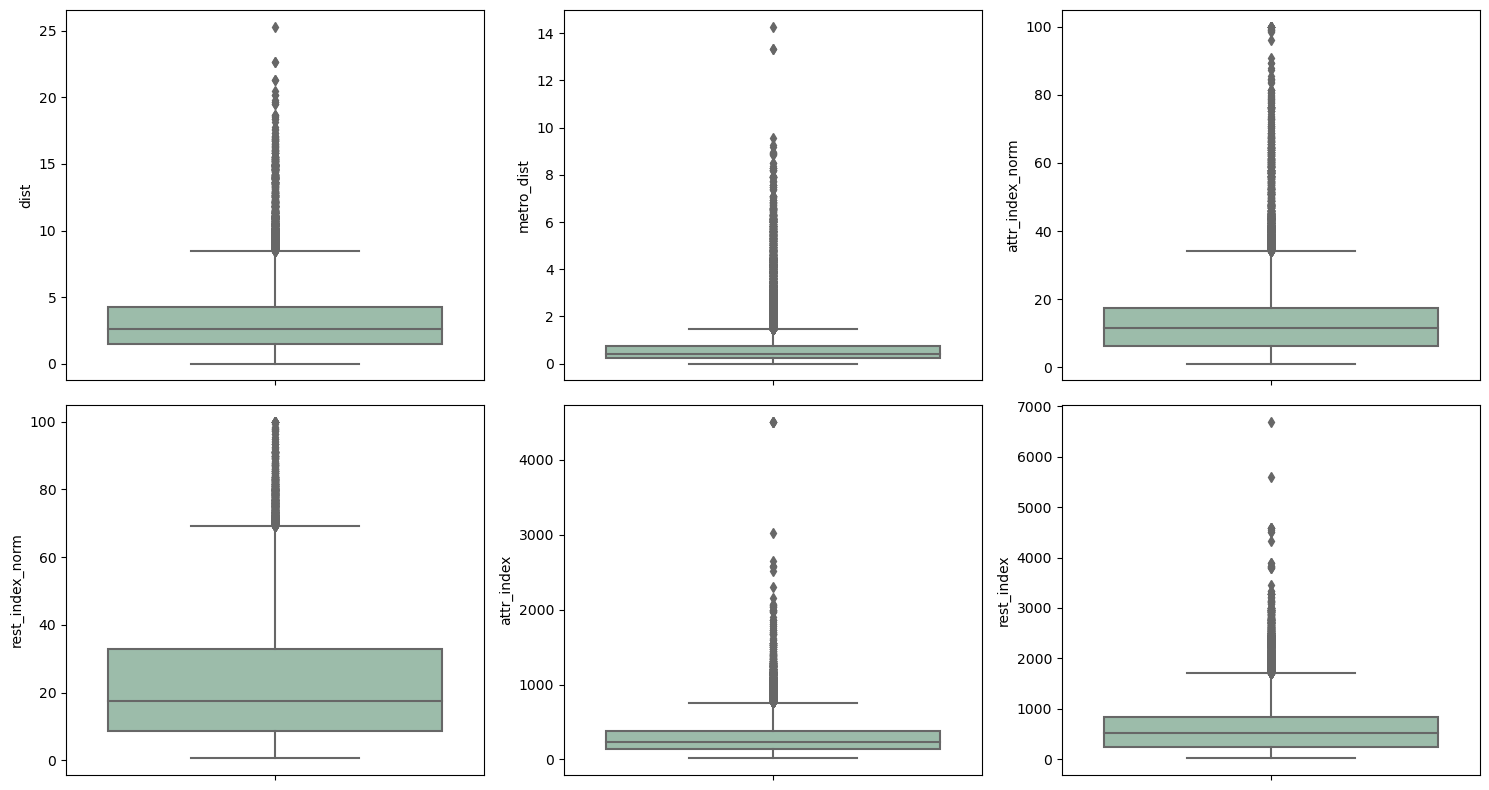

In [83]:
f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtrain[i] , ax = v , palette = colors)
    
plt.tight_layout()
plt.show()

#### For testing data

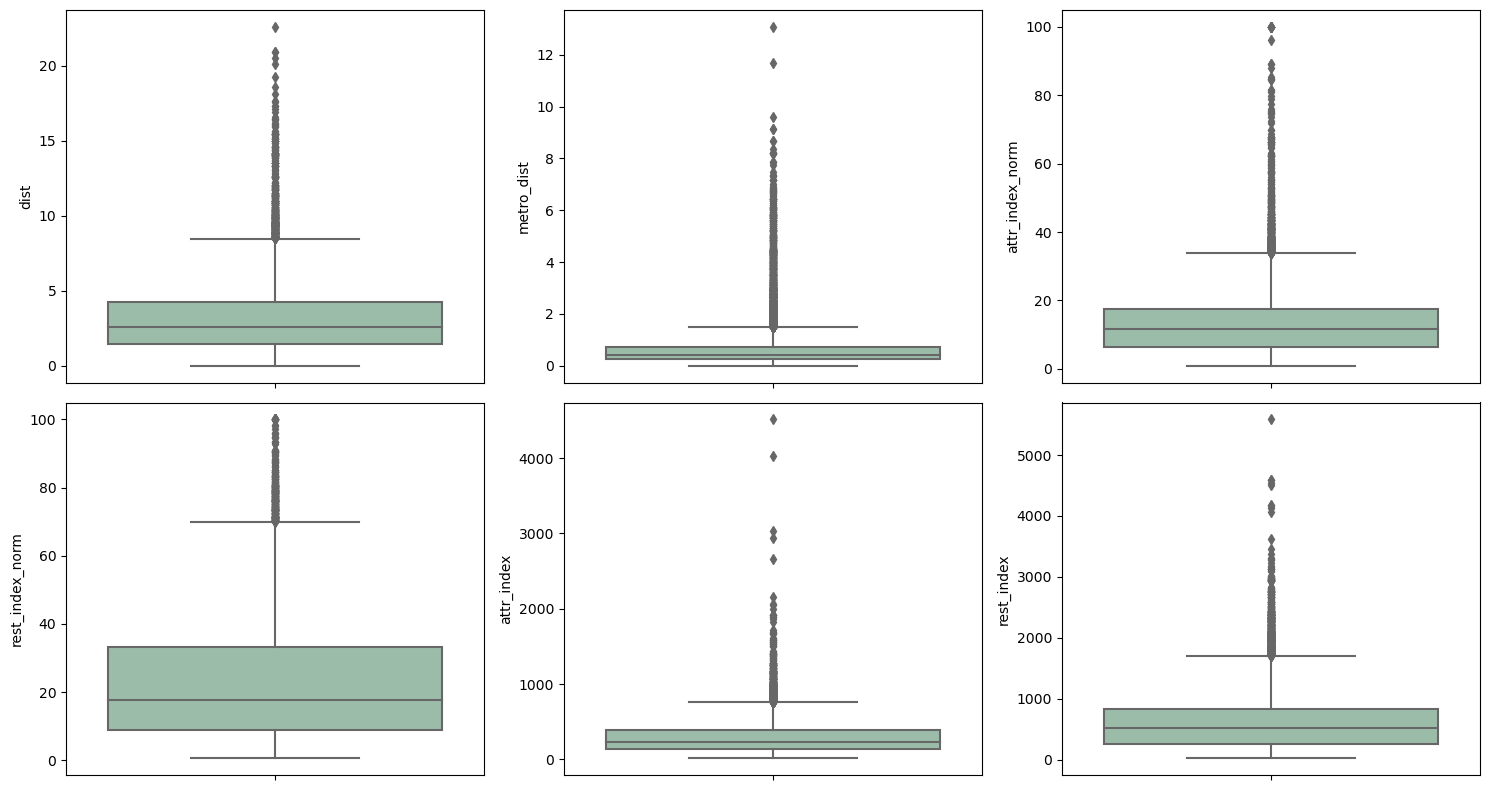

In [84]:
f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtest[i] , ax = v, palette = colors)
    
plt.tight_layout()
plt.show()

From above box plots it is clearly evident that there are outliers . By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [85]:
pt = PowerTransformer()

for i in num_cols:
    var = pt.fit(xtrain[[i]])
    
    xtrain[i] = var.transform(xtrain[[i]])
    xtest[i] = var.transform(xtest[[i]])

#### After treating outliers

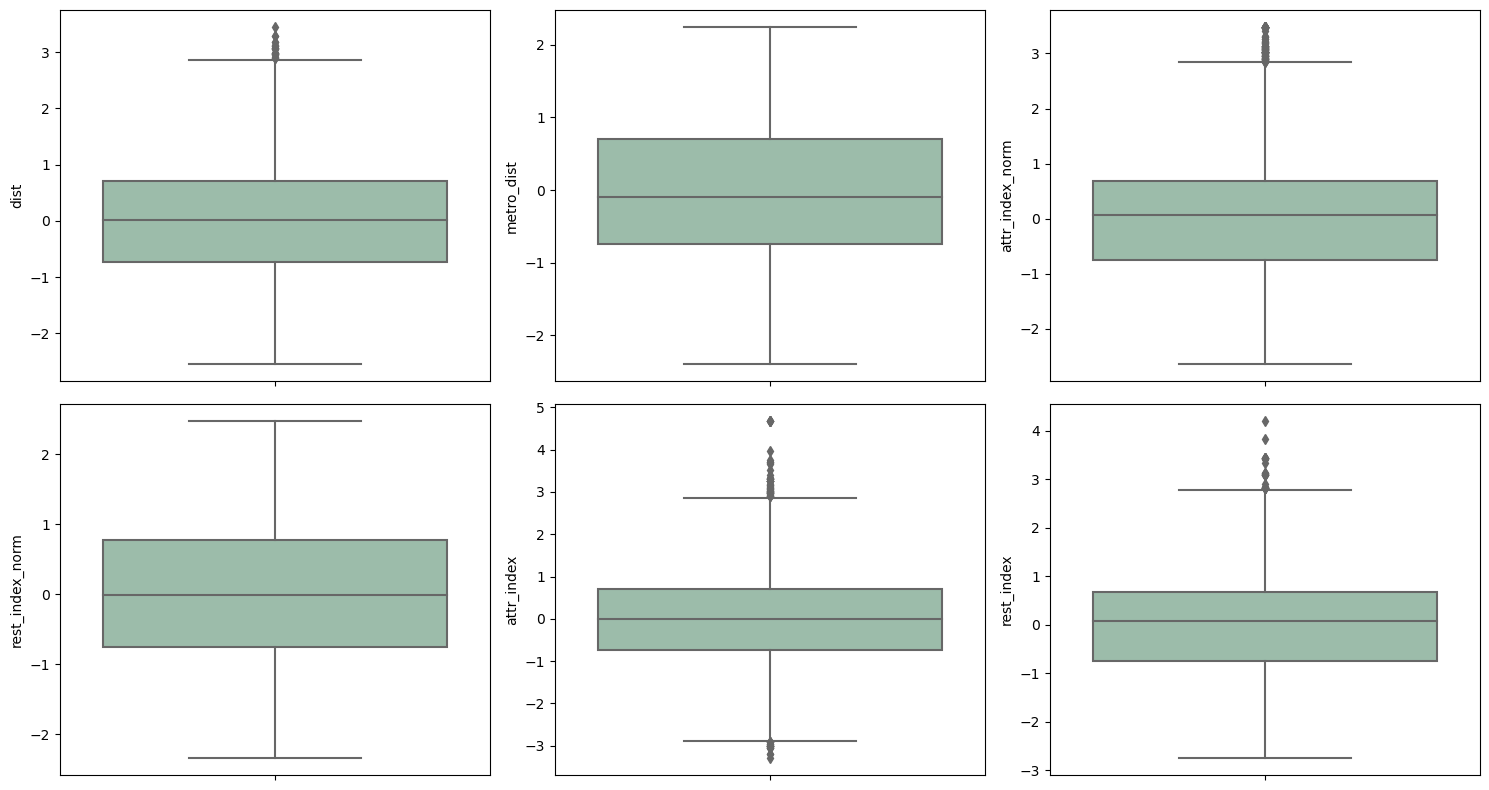

In [86]:
f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtrain[i] , ax = v , palette = colors)
    
plt.tight_layout()
plt.show()

### Building a Base Model

Building a base model using Linear Regression as it is having the highest explanatory power compared to other models

In [87]:
xtrain

City  Day  room_type  person_capacity  host_is_superhost  multi  \
31733  0.370252    1   0.255588                2                  0      0   
6108  -0.974896    1   0.255588                3                  1      1   
50254 -0.058587    1   0.255588                4                  1      0   
17082 -0.019765    0   0.255588                4                  0      0   
26349  0.370252    0   0.255588                4                  0      0   
...         ...  ...        ...              ...                ...    ...   
21633 -0.019765    1   0.255588                4                  0      0   
19857 -0.019765    1   0.255588                3                  0      0   
14528 -0.612586    0   0.255588                4                  1      0   
899    1.185099    0   0.255588                4                  0      0   
45474 -0.315801    1   0.255588                4                  0      0   

       biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
31733    0                   8                           2         1   
6108     0                  10                           2         1   
50254    0                  10                           2         1   
17082    1                   9                           2         1   
26349    1                   7                           1         1   
...    ...                 ...                         ...       ...   
21633    1                  10                           2         1   
19857    1                  10                           2         1   
14528    1                  10                           2         1   
899      0                  10                           2         2   
45474    1                   9                           2         2   

           dist  metro_dist  attr_index  attr_index_norm  rest_index  \
31733  1.558951    1.693711   -0.606800        -0.069608   -0.446957   
6108  -0.912802    0.382449   -0.956673        -1.236919   -1.237761   
50254  0.605870    0.952535   -1.766019        -1.244760   -1.726974   
17082 -1.275237    0.376266    0.783126         0.302589    0.641928   
26349 -1.209183   -0.269746    1.544790         2.243195    1.833495   
...         ...         ...         ...              ...         ...   
21633 -0.635527    1.189612   -0.667894        -1.127526   -0.055491   
19857 -1.642615   -0.386063    0.932150         0.451322    0.547815   
14528 -1.222193   -0.496587    0.036426         0.396181    0.255403   
899    0.273717    0.431224   -0.462081        -0.298385   -0.909977   
45474  0.235467    1.396986    0.322391        -0.704232    0.483463   

       rest_index_norm    Region  
31733        -1.102740  0.087943  
6108         -1.799038 -0.151284  
50254        -1.845516  0.016945  
17082         0.910647  0.016945  
26349         0.777961  0.087943  
...                ...       ...  
21633         0.477258  0.038198  
19857         1.131183  0.016945  
14528         1.231597  0.016945  
899          -0.203069  0.087943  
45474        -0.138603  0.038198  

[36194 rows x 17 columns]

In [88]:
model_lr = sma.OLS(ytrain,sma.add_constant(xtrain)).fit()

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4170.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:38:17   Log-Likelihood:                -31721.
No. Observations:               36194   AIC:                         6.348e+04
Df Residuals:                   36176   BIC:                         6.363e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.2840      0.039    -33.172      0.000      -1.360      -1.208
City                           1.0144      0.008    135.069      0.000       1.000       1.029
Day                            0.0417      0.006      6.766      0.000       0.030       0.054
room_type                      0.9831      0.011     91.493      0.000       0.962       1.004
person_capacity                0.1440      0.003     43.655      0.000       0.138       0.150
host_is_superhost              0.0347      0.007      4.658      0.000       0.020       0.049
multi                          0.0760      0.008      9.707      0.000       0.061       0.091
biz                            0.1838      0.008     23.842      0.000       0.169       0.199
cleanliness_rating             0.1089      0.004     28.447      0.000       0.101       0.116
guest_satisfaction_overall    -0.3027      0.019    -15.892      0.000      -0.340      -0.265
bedrooms                       0.2466      0.006     40.590      0.000       0.235       0.258
dist                          -0.0403      0.004     -9.021      0.000      -0.049      -0.032
metro_dist                     0.0144      0.003      4.229      0.000       0.008       0.021
attr_index                    -0.0166      0.012     -1.376      0.169      -0.040       0.007
attr_index_norm                0.3034      0.006     49.206      0.000       0.291       0.315
rest_index                     0.0380      0.010      3.705      0.000       0.018       0.058
rest_index_norm               -0.0211      0.005     -4.208      0.000      -0.031      -0.011
Region                        -0.1426      0.036     -3.918      0.000      -0.214      -0.071
==============================================================================
Omnibus:                     2811.223   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7807.113
Skew:                           0.433   Prob(JB):                         0.00
Kurtosis:                       5.104   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
pred_train = model_lr.predict(sma.add_constant(xtrain))
pred_test = model_lr.predict(sma.add_constant(xtest))

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))
mape_train = mean_absolute_percentage_error(ytrain,pred_train)
mape_test = mean_absolute_percentage_error(ytest,pred_test)

In [90]:
# Creating a dataframe to store values of metrics of both train and test data

performance_df = pd.DataFrame(columns = ['Model_Name','Train R2','Test R2','Train RMSE','Test RMSE'
                                         ,'Train MAPE','Test MAPE','Remarks'])

performance_df

Empty DataFrame
Columns: [Model_Name, Train R2, Test R2, Train RMSE, Test RMSE, Train MAPE, Test MAPE, Remarks]
Index: []

In [91]:
# Appending values of our base model to performance df

performance_df = performance_df.append({'Model_Name':'Base Model','Train R2':r2_train,'Test R2':r2_test,
                                       'Train RMSE':rmse_train,'Test RMSE':rmse_test,'Train MAPE':mape_train,
                                       'Test MAPE':mape_test,'Remarks':'Base'},ignore_index=True)

performance_df

Model_Name  Train R2   Test R2  Train RMSE  Test RMSE  Train MAPE  \
0  Base Model   0.66211  0.653968    0.581283   0.584654   56.088907   

   Test MAPE Remarks  
0  18.944154    Base

### Building different models and evaluating using appropriate technique

In [92]:
# Creating a user defined function to store values of metrics to the dataframe

def model_performance(model , name):
    global performance_df
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    r2_train = r2_score(ytrain,pred_train)
    r2_test = r2_score(ytest,pred_test)
    rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))
    mape_train = mean_absolute_percentage_error(ytrain,pred_train)
    mape_test = mean_absolute_percentage_error(ytest,pred_test)
    
    # Defining a function for remarks
    
    def remarks(train,test):
        if abs(train - test) > 0.1 or train > 0.90:
            return 'Over Fit'
        elif train > 0.5 and test > 0.5:
            return 'Good Fit'
        else :
            return 'Under Fit'
    
    performance_df = performance_df.append({'Model_Name':name,'Train R2':r2_train,'Test R2':r2_test,'Train RMSE':rmse_train,
                                          'Test RMSE':rmse_test,'Train MAPE':mape_train,'Test MAPE':mape_test,
                                           'Remarks':remarks(r2_train,r2_test)},ignore_index = True)

In [93]:
# Creating a user defined function to highlight the rows which are good fit

def highlight_row(df):
    color_green = ['background-color : #97C1A9']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

#### Decision Tree Model

In [94]:
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)

model_performance(model_dt,'Decision Tree')

#### Random Forest Model

In [95]:
model_rf = RandomForestRegressor().fit(xtrain,ytrain)

model_performance(model_rf,'Random Forest')

#### KNN

In [96]:
model_knn = KNeighborsRegressor().fit(xtrain,ytrain)

model_performance(model_knn, 'KNN')

#### AdaBoost

In [97]:
model_ab = AdaBoostRegressor().fit(xtrain,ytrain)

model_performance(model_ab,'AdaBoost')

#### Gradient Boosting

In [98]:
model_gb = GradientBoostingRegressor().fit(xtrain,ytrain)

model_performance(model_gb , 'Gradient Boosting')

#### XGBoost

In [99]:
model_xgb = XGBRegressor().fit(xtrain,ytrain)

model_performance(model_xgb, 'XGBoost')

#### Neural Network

In [100]:
model_nn = MLPRegressor().fit(xtrain,ytrain)

model_performance(model_nn, 'Neural Network')

#### CatBoost

In [101]:
model_cb = CatBoostRegressor().fit(xtrain,ytrain)

model_performance(model_cb, 'CatBoost')

Learning rate set to 0.072185
0:	learn: 0.9579867	total: 141ms	remaining: 2m 21s
1:	learn: 0.9195192	total: 153ms	remaining: 1m 16s
2:	learn: 0.8860296	total: 163ms	remaining: 54.3s
3:	learn: 0.8552237	total: 174ms	remaining: 43.3s
4:	learn: 0.8262818	total: 189ms	remaining: 37.6s
5:	learn: 0.7995746	total: 203ms	remaining: 33.7s
6:	learn: 0.7765343	total: 215ms	remaining: 30.5s
7:	learn: 0.7544273	total: 228ms	remaining: 28.2s
8:	learn: 0.7358304	total: 239ms	remaining: 26.3s
9:	learn: 0.7183826	total: 250ms	remaining: 24.7s
10:	learn: 0.7019796	total: 257ms	remaining: 23.1s
11:	learn: 0.6875885	total: 264ms	remaining: 21.7s
12:	learn: 0.6750950	total: 271ms	remaining: 20.6s
13:	learn: 0.6638052	total: 278ms	remaining: 19.6s
14:	learn: 0.6535420	total: 286ms	remaining: 18.8s
15:	learn: 0.6444852	total: 294ms	remaining: 18.1s
16:	learn: 0.6363529	total: 302ms	remaining: 17.5s
17:	learn: 0.6284220	total: 309ms	remaining: 16.8s
18:	learn: 0.6213711	total: 316ms	remaining: 16.3s
19:	learn

166:	learn: 0.5141168	total: 1.31s	remaining: 6.56s
167:	learn: 0.5139305	total: 1.32s	remaining: 6.55s
168:	learn: 0.5137805	total: 1.33s	remaining: 6.53s
169:	learn: 0.5137000	total: 1.33s	remaining: 6.52s
170:	learn: 0.5135448	total: 1.34s	remaining: 6.5s
171:	learn: 0.5133337	total: 1.35s	remaining: 6.49s
172:	learn: 0.5131986	total: 1.35s	remaining: 6.47s
173:	learn: 0.5130404	total: 1.36s	remaining: 6.45s
174:	learn: 0.5128656	total: 1.37s	remaining: 6.44s
175:	learn: 0.5126309	total: 1.37s	remaining: 6.44s
176:	learn: 0.5124556	total: 1.38s	remaining: 6.42s
177:	learn: 0.5122964	total: 1.39s	remaining: 6.41s
178:	learn: 0.5121953	total: 1.39s	remaining: 6.4s
179:	learn: 0.5119470	total: 1.4s	remaining: 6.38s
180:	learn: 0.5117983	total: 1.41s	remaining: 6.37s
181:	learn: 0.5116005	total: 1.41s	remaining: 6.36s
182:	learn: 0.5114221	total: 1.42s	remaining: 6.34s
183:	learn: 0.5112886	total: 1.43s	remaining: 6.33s
184:	learn: 0.5112128	total: 1.43s	remaining: 6.32s
185:	learn: 0.5

344:	learn: 0.4923664	total: 2.44s	remaining: 4.63s
345:	learn: 0.4922631	total: 2.45s	remaining: 4.63s
346:	learn: 0.4921304	total: 2.45s	remaining: 4.62s
347:	learn: 0.4920528	total: 2.46s	remaining: 4.61s
348:	learn: 0.4919840	total: 2.46s	remaining: 4.6s
349:	learn: 0.4919069	total: 2.47s	remaining: 4.59s
350:	learn: 0.4918227	total: 2.48s	remaining: 4.58s
351:	learn: 0.4916808	total: 2.48s	remaining: 4.57s
352:	learn: 0.4915772	total: 2.49s	remaining: 4.56s
353:	learn: 0.4914755	total: 2.5s	remaining: 4.55s
354:	learn: 0.4914250	total: 2.5s	remaining: 4.54s
355:	learn: 0.4913341	total: 2.51s	remaining: 4.54s
356:	learn: 0.4912285	total: 2.51s	remaining: 4.53s
357:	learn: 0.4911750	total: 2.52s	remaining: 4.52s
358:	learn: 0.4910772	total: 2.53s	remaining: 4.51s
359:	learn: 0.4909515	total: 2.53s	remaining: 4.5s
360:	learn: 0.4908487	total: 2.54s	remaining: 4.49s
361:	learn: 0.4907206	total: 2.54s	remaining: 4.49s
362:	learn: 0.4906232	total: 2.55s	remaining: 4.48s
363:	learn: 0.49

520:	learn: 0.4773946	total: 3.54s	remaining: 3.25s
521:	learn: 0.4773319	total: 3.55s	remaining: 3.25s
522:	learn: 0.4772570	total: 3.56s	remaining: 3.25s
523:	learn: 0.4771777	total: 3.57s	remaining: 3.24s
524:	learn: 0.4770549	total: 3.58s	remaining: 3.23s
525:	learn: 0.4769864	total: 3.58s	remaining: 3.23s
526:	learn: 0.4769432	total: 3.59s	remaining: 3.22s
527:	learn: 0.4768742	total: 3.6s	remaining: 3.22s
528:	learn: 0.4768306	total: 3.61s	remaining: 3.21s
529:	learn: 0.4767546	total: 3.62s	remaining: 3.21s
530:	learn: 0.4766474	total: 3.63s	remaining: 3.2s
531:	learn: 0.4765768	total: 3.63s	remaining: 3.2s
532:	learn: 0.4765126	total: 3.65s	remaining: 3.19s
533:	learn: 0.4764159	total: 3.66s	remaining: 3.19s
534:	learn: 0.4762966	total: 3.67s	remaining: 3.19s
535:	learn: 0.4761949	total: 3.67s	remaining: 3.18s
536:	learn: 0.4761146	total: 3.68s	remaining: 3.18s
537:	learn: 0.4760397	total: 3.69s	remaining: 3.17s
538:	learn: 0.4759892	total: 3.7s	remaining: 3.16s
539:	learn: 0.47

693:	learn: 0.4649698	total: 5.08s	remaining: 2.24s
694:	learn: 0.4649389	total: 5.08s	remaining: 2.23s
695:	learn: 0.4648505	total: 5.09s	remaining: 2.22s
696:	learn: 0.4648049	total: 5.1s	remaining: 2.22s
697:	learn: 0.4647412	total: 5.11s	remaining: 2.21s
698:	learn: 0.4646636	total: 5.12s	remaining: 2.2s
699:	learn: 0.4645563	total: 5.12s	remaining: 2.2s
700:	learn: 0.4644803	total: 5.13s	remaining: 2.19s
701:	learn: 0.4644462	total: 5.14s	remaining: 2.18s
702:	learn: 0.4643834	total: 5.14s	remaining: 2.17s
703:	learn: 0.4643257	total: 5.15s	remaining: 2.17s
704:	learn: 0.4642595	total: 5.16s	remaining: 2.16s
705:	learn: 0.4641938	total: 5.17s	remaining: 2.15s
706:	learn: 0.4641525	total: 5.17s	remaining: 2.14s
707:	learn: 0.4640792	total: 5.18s	remaining: 2.14s
708:	learn: 0.4640007	total: 5.19s	remaining: 2.13s
709:	learn: 0.4639109	total: 5.2s	remaining: 2.12s
710:	learn: 0.4638288	total: 5.2s	remaining: 2.12s
711:	learn: 0.4637847	total: 5.21s	remaining: 2.11s
712:	learn: 0.463

860:	learn: 0.4545070	total: 6.2s	remaining: 1s
861:	learn: 0.4544484	total: 6.2s	remaining: 993ms
862:	learn: 0.4544086	total: 6.21s	remaining: 986ms
863:	learn: 0.4543521	total: 6.21s	remaining: 978ms
864:	learn: 0.4542972	total: 6.22s	remaining: 971ms
865:	learn: 0.4542560	total: 6.23s	remaining: 964ms
866:	learn: 0.4542270	total: 6.23s	remaining: 956ms
867:	learn: 0.4541715	total: 6.24s	remaining: 949ms
868:	learn: 0.4540901	total: 6.25s	remaining: 942ms
869:	learn: 0.4540412	total: 6.25s	remaining: 934ms
870:	learn: 0.4540205	total: 6.26s	remaining: 927ms
871:	learn: 0.4539361	total: 6.26s	remaining: 920ms
872:	learn: 0.4538892	total: 6.27s	remaining: 913ms
873:	learn: 0.4538280	total: 6.28s	remaining: 906ms
874:	learn: 0.4537684	total: 6.29s	remaining: 898ms
875:	learn: 0.4537044	total: 6.3s	remaining: 891ms
876:	learn: 0.4536525	total: 6.3s	remaining: 884ms
877:	learn: 0.4536123	total: 6.31s	remaining: 877ms
878:	learn: 0.4535559	total: 6.32s	remaining: 869ms
879:	learn: 0.45350

In [103]:
performance_df.style.apply(highlight_row,axis=1)

After evaluating numerous models, it was found that some of them significantly underperformed when used with unknown data, which is an indication of overfitting. However, certain models consistently outperformed others on both training and illustrative data. Notably, the performance of the XGB model was superior than that of other variants. We can therefore definitely select the XGB model as our preferred option due to its higher performance and generalizability.